In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib qt
# %matplotlib osx


sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())

# sns.set_palette('colorblind')


'2018-10-14 18:07:40.122802'

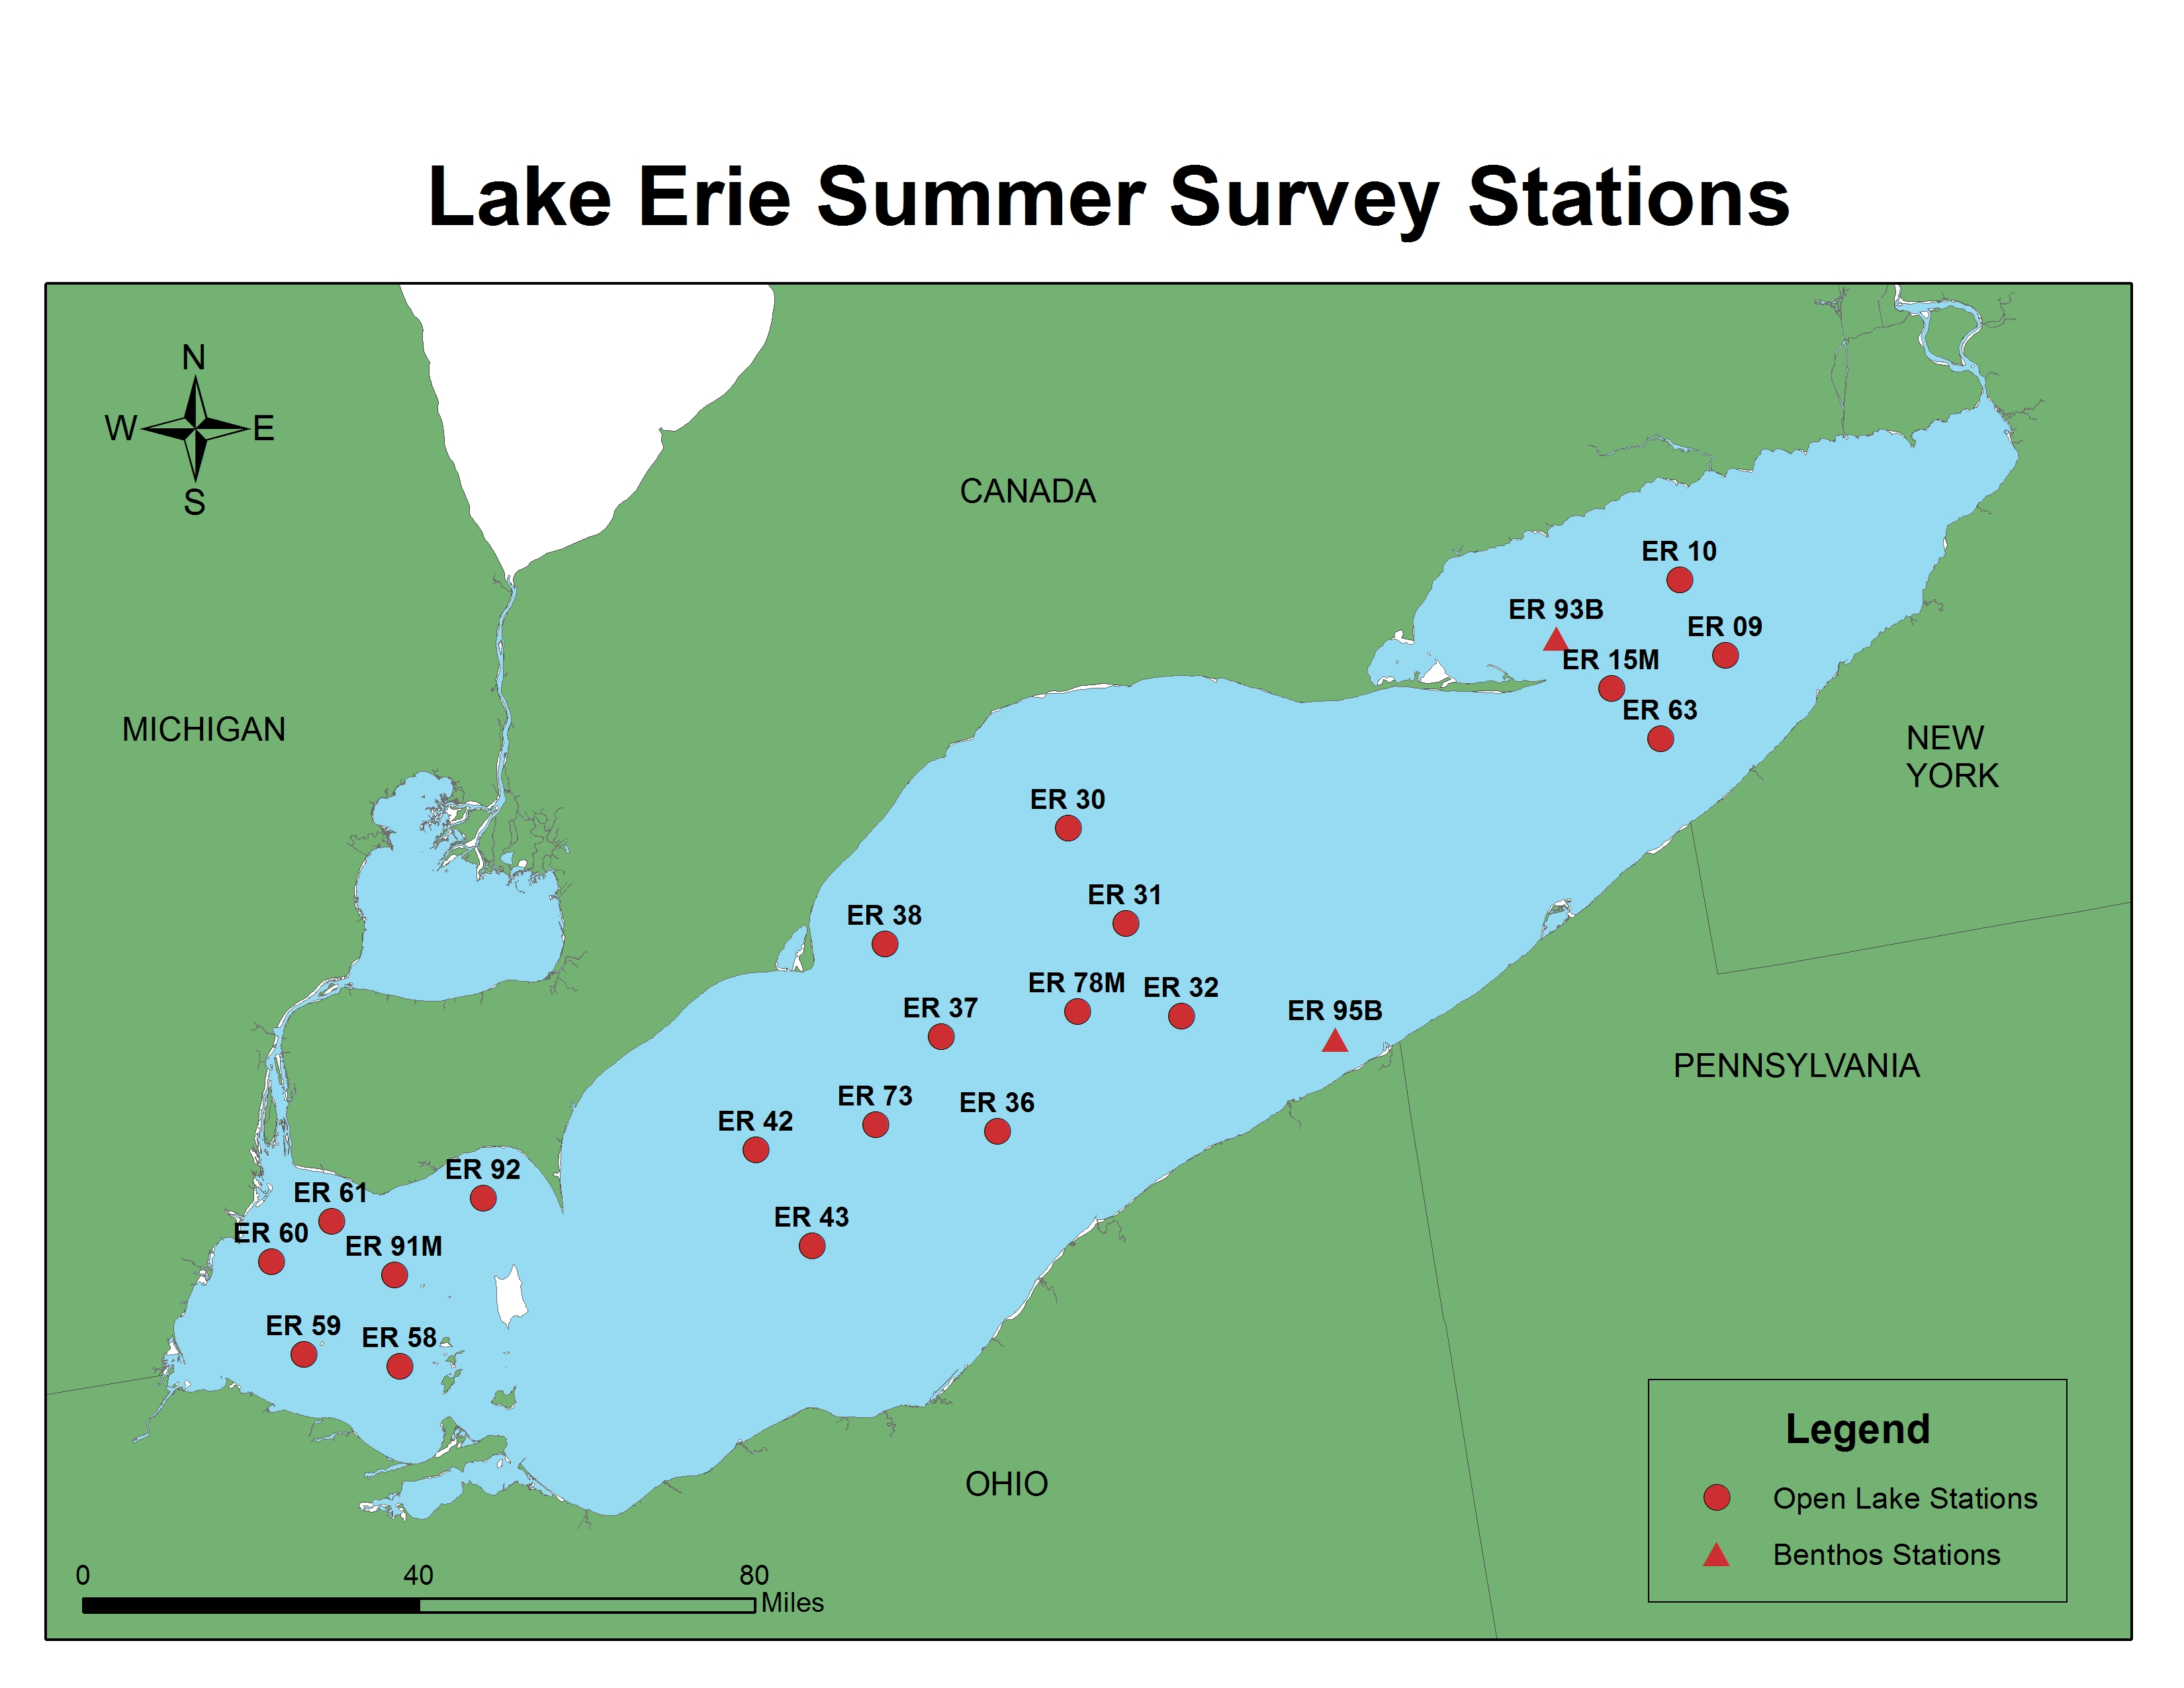

In [2]:
from IPython.display import Image
Image(filename='../../measurements/GLNPO/Erie_Summer_Survey2017.jpg') 

In [3]:
Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
Cl = Cl[Cl.QC_TYPE=='routine field sample']
Cl = Cl[~Cl.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
Cl = Cl[Cl.YEAR>2002]
Cl.loc[:,'SAMPLE_DEPTH_M'] *= -1

In [14]:
eastern_basin = ['ER15M', 'ER09', 'ER63', 'ER10']
central_basin = ['ER78M', 'ER38', 'ER37', 'ER42', 'ER30', 'ER73'] #'ER36', 'ER32', 'ER43','ER31',
western_basin = ['ER58', 'ER59', 'ER61', 'ER60', 'ER92', 'ER91M']

In [5]:
stations = eastern_basin + central_basin + western_basin
years = range(2003,2018)
seasons = ['Spring', 'Summer']

In [6]:
Cl = Cl[Cl['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
Cl = Cl[Cl['SEASON'].isin(seasons)]
Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')

In [7]:
Cl[Cl.YEAR>1999].groupby(['STATION_ID','SEASON']).describe()['VALUE_1'].applymap('{:.1f}'.format)

count  mean   std   min   25%   50%   75%   max
STATION_ID SEASON                                                 
ER09       Spring   64.0  17.0   2.7   7.0  17.1  17.8  18.1  19.5
           Summer   68.0  17.7   0.6  16.5  17.2  17.7  18.0  19.7
ER10       Spring   63.0  17.2   2.8   6.9  17.3  17.8  18.3  19.8
           Summer   63.0  17.7   1.3   9.1  17.1  18.0  18.3  19.9
ER15M      Spring  136.0  17.0   2.6   7.0  17.0  17.7  18.1  18.4
           Summer  124.0  17.6   0.7  15.9  17.1  17.8  18.0  19.6
ER30       Spring   48.0  16.7   0.9  15.0  16.1  16.9  17.5  18.0
           Summer   55.0  16.8   0.7  15.1  16.5  16.8  17.1  18.3
ER31       Spring   48.0  16.7   0.8  14.8  16.3  16.8  17.2  18.1
           Summer   51.0  16.7   0.8  15.2  16.2  16.6  16.9  19.2
ER32       Spring   48.0  17.4   2.0  14.0  16.1  17.0  18.5  22.0
           Summer   54.0  16.7   1.0  13.5  16.4  16.6  17.4  18.1
ER36       Spring   48.0  17.3   2.1  14.2  16.1  16.8  17.8  23.5
           Summer   53.0  16.9   0.9  15.5  16.6  16.9  17.3  20.2
ER37       Spring   47.0  16.8   0.8  13.7  16.3  16.7  17.6  17.9
           Summer   55.0  16.7   0.8  15.0  16.1  16.8  17.3  18.2
ER38       Spring   48.0  16.5   2.6   0.0  16.1  16.6  17.4  18.4
           Summer   62.0  16.5   0.9  14.4  15.8  16.5  17.0  18.3
ER42       Spring   47.0  16.5   1.1  13.1  16.1  16.4  17.4  17.8
           Summer   55.0  16.7   1.0  13.9  16.2  16.9  17.4  18.1
ER43       Spring   47.0  16.0   1.9  11.1  15.3  16.4  17.2  19.1
           Summer   53.0  17.1   1.0  15.0  16.6  17.3  17.6  19.5
ER58       Spring   48.0  18.5   5.1  12.9  13.6  16.9  22.1  28.9
           Summer   45.0  14.3   1.1  12.6  13.6  13.9  14.9  16.4
ER59       Spring   48.0  19.2   8.1  10.6  12.6  16.0  25.3  38.5
           Summer   45.0  13.7   1.8  11.5  12.2  13.2  15.1  18.1
ER60       Spring   45.0  14.6   5.2   9.2  10.2  13.9  16.4  26.6
           Summer   45.0  12.0   2.7   8.6   9.8  11.3  13.7  17.0
ER61       Spring   51.0  15.6  10.3   8.2   9.2  13.3  15.1  50.8
           Summer   45.0   9.4   1.1   7.7   8.2   9.4  10.3  11.1
ER63       Spring   63.0  16.9   2.7   7.0  17.2  17.8  18.1  18.6
           Summer   65.0  17.6   0.6  15.9  17.2  17.7  17.9  18.9
ER73       Spring   47.0  16.8   1.0  14.8  16.2  17.1  17.4  19.7
           Summer   55.0  16.9   1.0  15.2  16.3  16.9  17.3  19.6
ER78M      Spring   68.0  16.5   1.0  14.4  16.3  16.6  17.1  18.6
           Summer   88.0  16.7   0.8  15.2  16.2  16.8  17.1  18.9
ER91M      Spring   47.0  15.9   5.4   9.4  12.2  13.4  20.1  26.2
           Summer   45.0  11.8   2.2   8.8  10.5  11.0  12.7  17.3
ER92       Spring   48.0  16.0   2.8  12.4  14.2  15.3  17.6  24.6
           Summer   44.0  11.9   1.3   9.2  10.9  11.8  12.9  14.3

In [8]:
import numpy as np
from scipy import interpolate

# x = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
# y = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

# tck,u  = interpolate.splprep([x,y], s=0)
# unew = np.arange(0, 1.00, 0.1)
# out = interpolate.splev(unew, tck)

# # tck = interpolate.splrep(x, y, s=0)
# # xnew = np.arange(0, 2*np.pi, np.pi/50)
# # ynew = interpolate.splev(xnew, tck, der=0)

In [9]:
# # %matplotlib notebook
# # %matplotlib qt
# f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=50, sharex=False, sharey=True)
# for j, y in enumerate(years):
#     for k, s in enumerate(seasons):
#         for i, b in enumerate([western_basin, central_basin, eastern_basin]):
#             data = Cl[(Cl['STATION_ID'].isin(b)) & 
#                       (Cl['YEAR']==y) & 
#                       (Cl['SEASON']==s)]
#             dfs = []
#             z = np.linspace(data['SAMPLE_DEPTH_M'].min(),data['SAMPLE_DEPTH_M'].max(),101)
#             for station in data['STATION_ID'].unique():
#                 val = np.interp (z, data[data['STATION_ID']==station]['SAMPLE_DEPTH_M'], data[data['STATION_ID']==station]['VALUE_1'])
#                 df = pd.DataFrame({'st':station,'z':z, 'val':val})
#                 dfs.append(df)
            
#             data = pd.concat(dfs).groupby(['z']).describe().reset_index()
            
#             if s=='Spring':
#                 clr=sns.color_palette().as_hex()[0]
#             if s=='Summer':
#                 clr=sns.color_palette().as_hex()[2]
# #             axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
# #             axes[i][j].scatter(data.VALUE_1['mean'], -data.SAMPLE_DEPTH_M['mean'], c=clr)
#             axes[i][j].plot(data['val']['mean'], -data['z'], c=clr, lw=2)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alpha=0.5, lw=0., color=clr)
# #             axes[i][j].set_xlim(0,30)
#             axes[i][j].set_ylim(-64,0)
#             axes[i][j].grid(lw=0.2)
# axes[0][14].legend(['Spring', 'Summer'])
# # axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# # limits = []
# # for line in axes:
# #     low = [a.get_xlim()[0] for a in line]
# #     high = [a.get_xlim()[1] for a in line]
# #     limits.append((np.floor(min(low)),np.ceil(max(high))))
    
# for i,ax in enumerate(axes[0]):
#     axes[0][i].set_xlim(0,30)
#     axes[1][i].set_xlim(15,20)
#     axes[2][i].set_xlim(15,20)

# axes[0][0].set_ylabel('Depth, [m]')
# axes[1][0].set_ylabel('Depth, [m]')
# axes[2][0].set_ylabel('Depth, [m]')
# axes[2][0].text(8.5,-0.2, 'Chloride concnetrations, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# # plt.draw()
# # f.savefig('Mass Balance/GLENDA/All Stations/Example_3_Chloride_mgL_0_30.pdf')

In [10]:
data

NameError: name 'data' is not defined

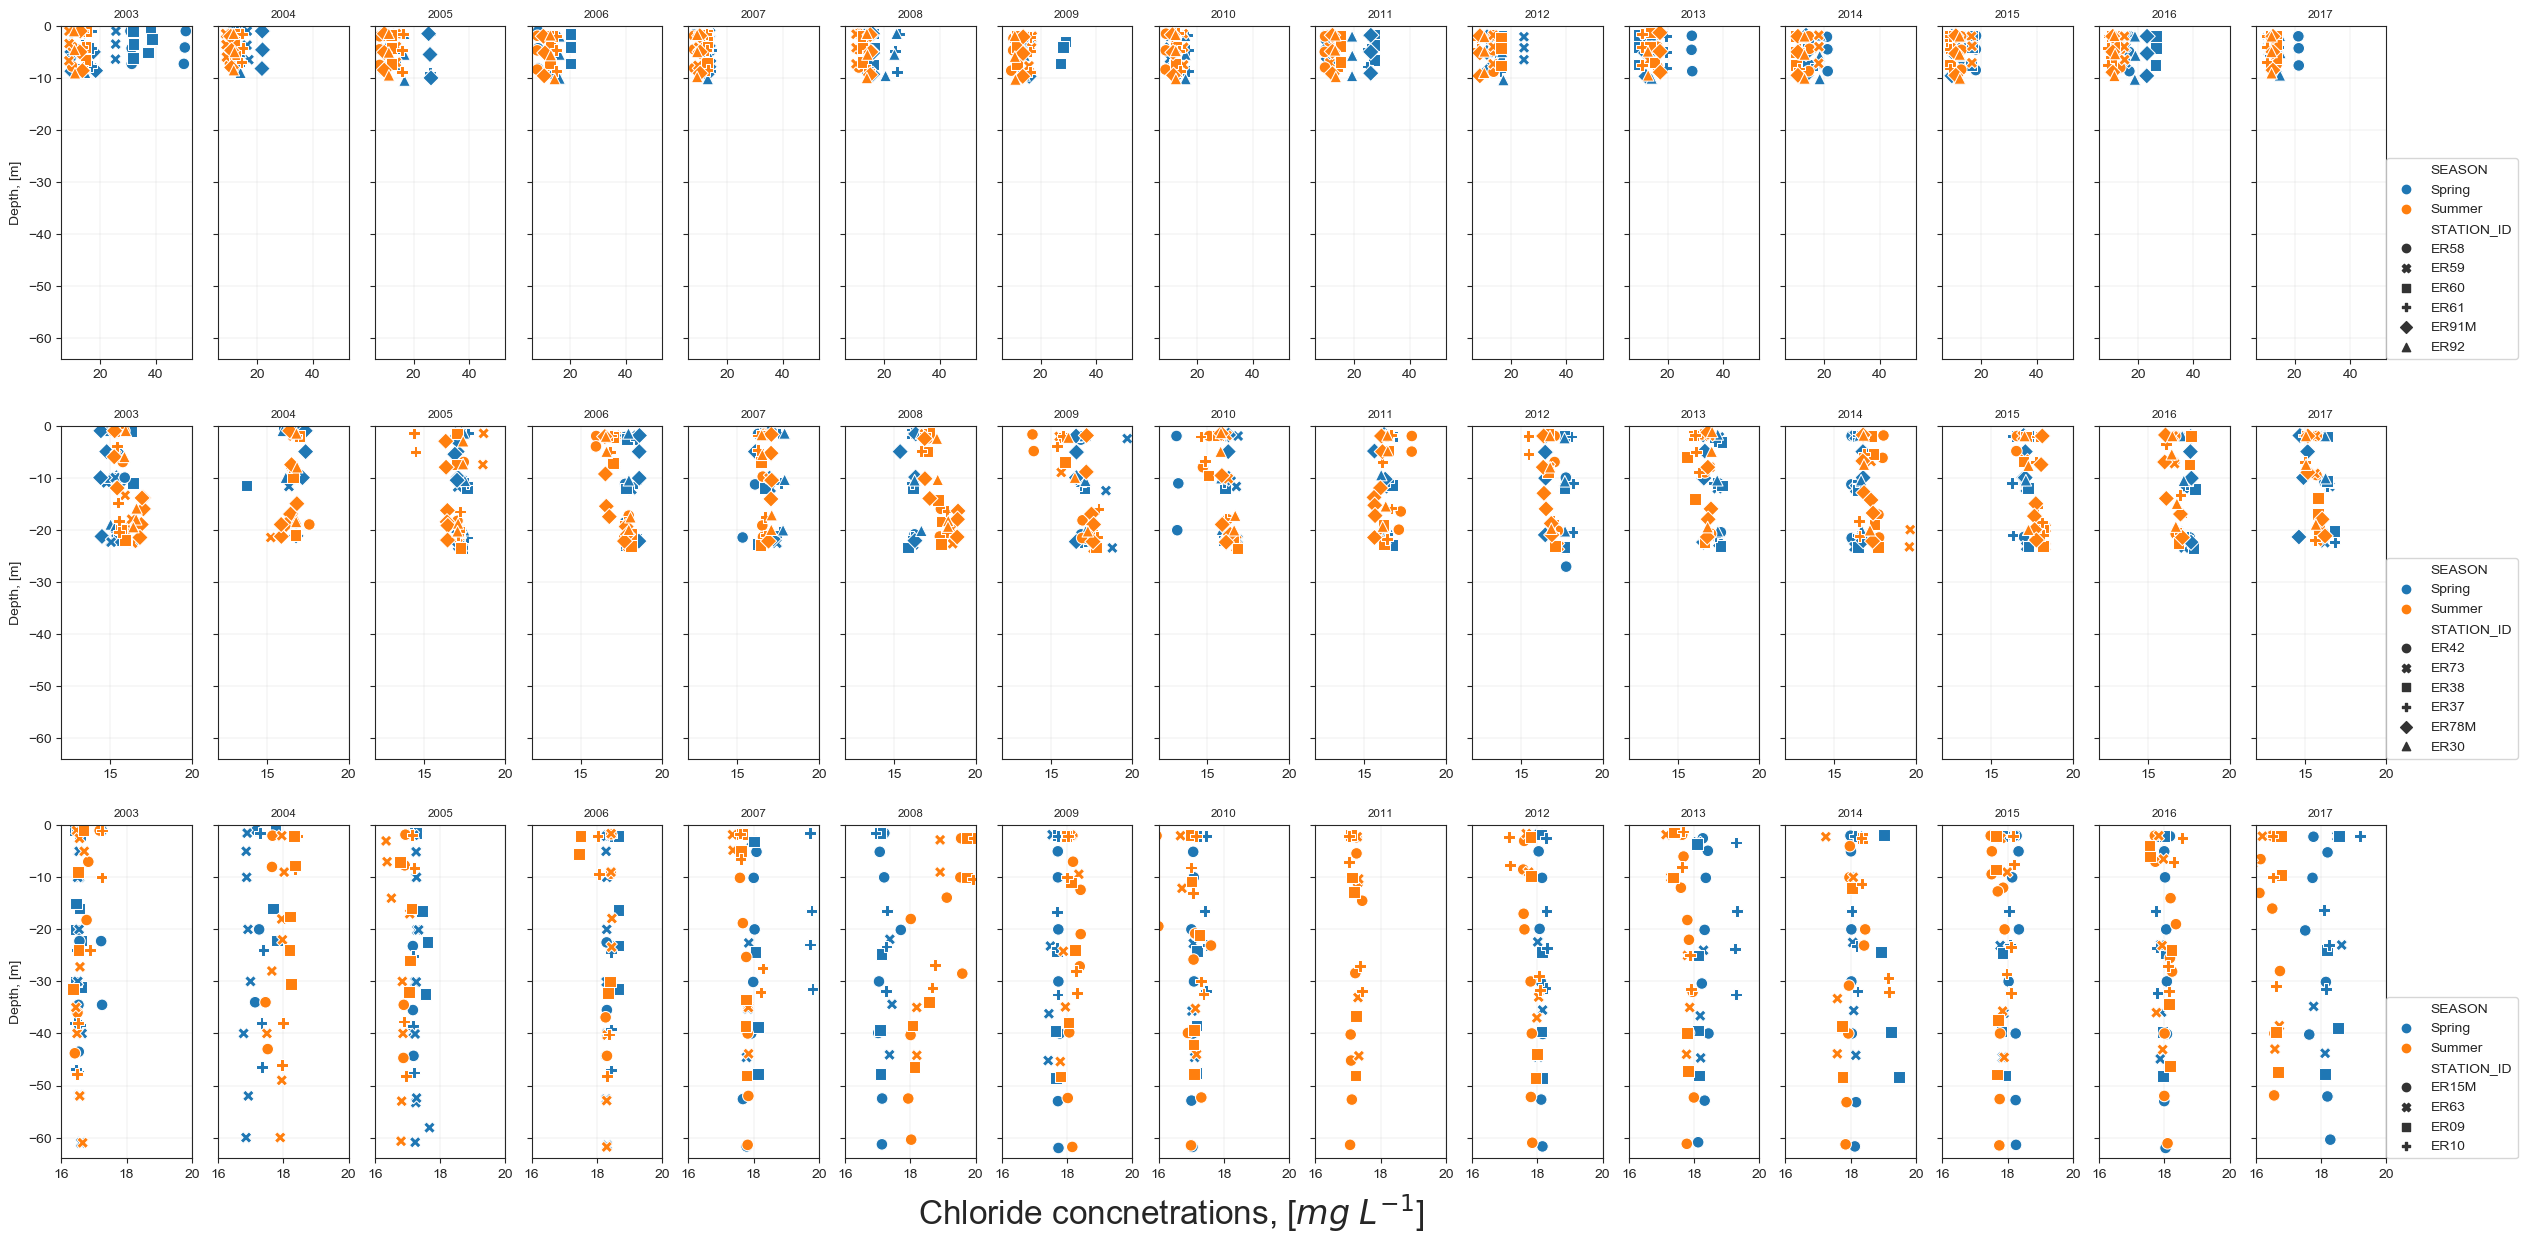

In [26]:
# %matplotlib osx
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = Cl[(Cl['STATION_ID'].isin(b)) & (Cl['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
            tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
            unew = np.arange(xold.min(), xold.max(), 1)
            out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alpha=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

axes[2][2].set_xlim(16,18)
axes[2][0].set_xlim(16,17.5)

limits = []
for line in axes:
    low = [a.get_xlim()[0] for a in line]
    high = [a.get_xlim()[1] for a in line]
    limits.append((np.floor(min(low)),np.ceil(max(high))))
    
for i,ax in enumerate(axes[0]):
    axes[0][i].set_xlim(limits[0])
    axes[1][i].set_xlim(limits[1])
    axes[2][i].set_xlim(limits[2])
#     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Chloride concnetrations, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/Chloride_mgL_16_20.pdf')




In [29]:
Temp = pd.read_csv('../../measurements/GLNPO/Mass Balance/Temp.csv')
Temp = Temp[Temp.QC_TYPE=='routine field sample']
Temp = Temp[~Temp.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
Temp = Temp[Temp.YEAR>2002]
Temp.loc[:,'SAMPLE_DEPTH_M'] *= -1
Temp = Temp[Temp['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
Temp = Temp[Temp['SEASON'].isin(seasons)]
Temp['VALUE_1'] = pd.to_numeric(Temp['VALUE_1'], errors='coerce')

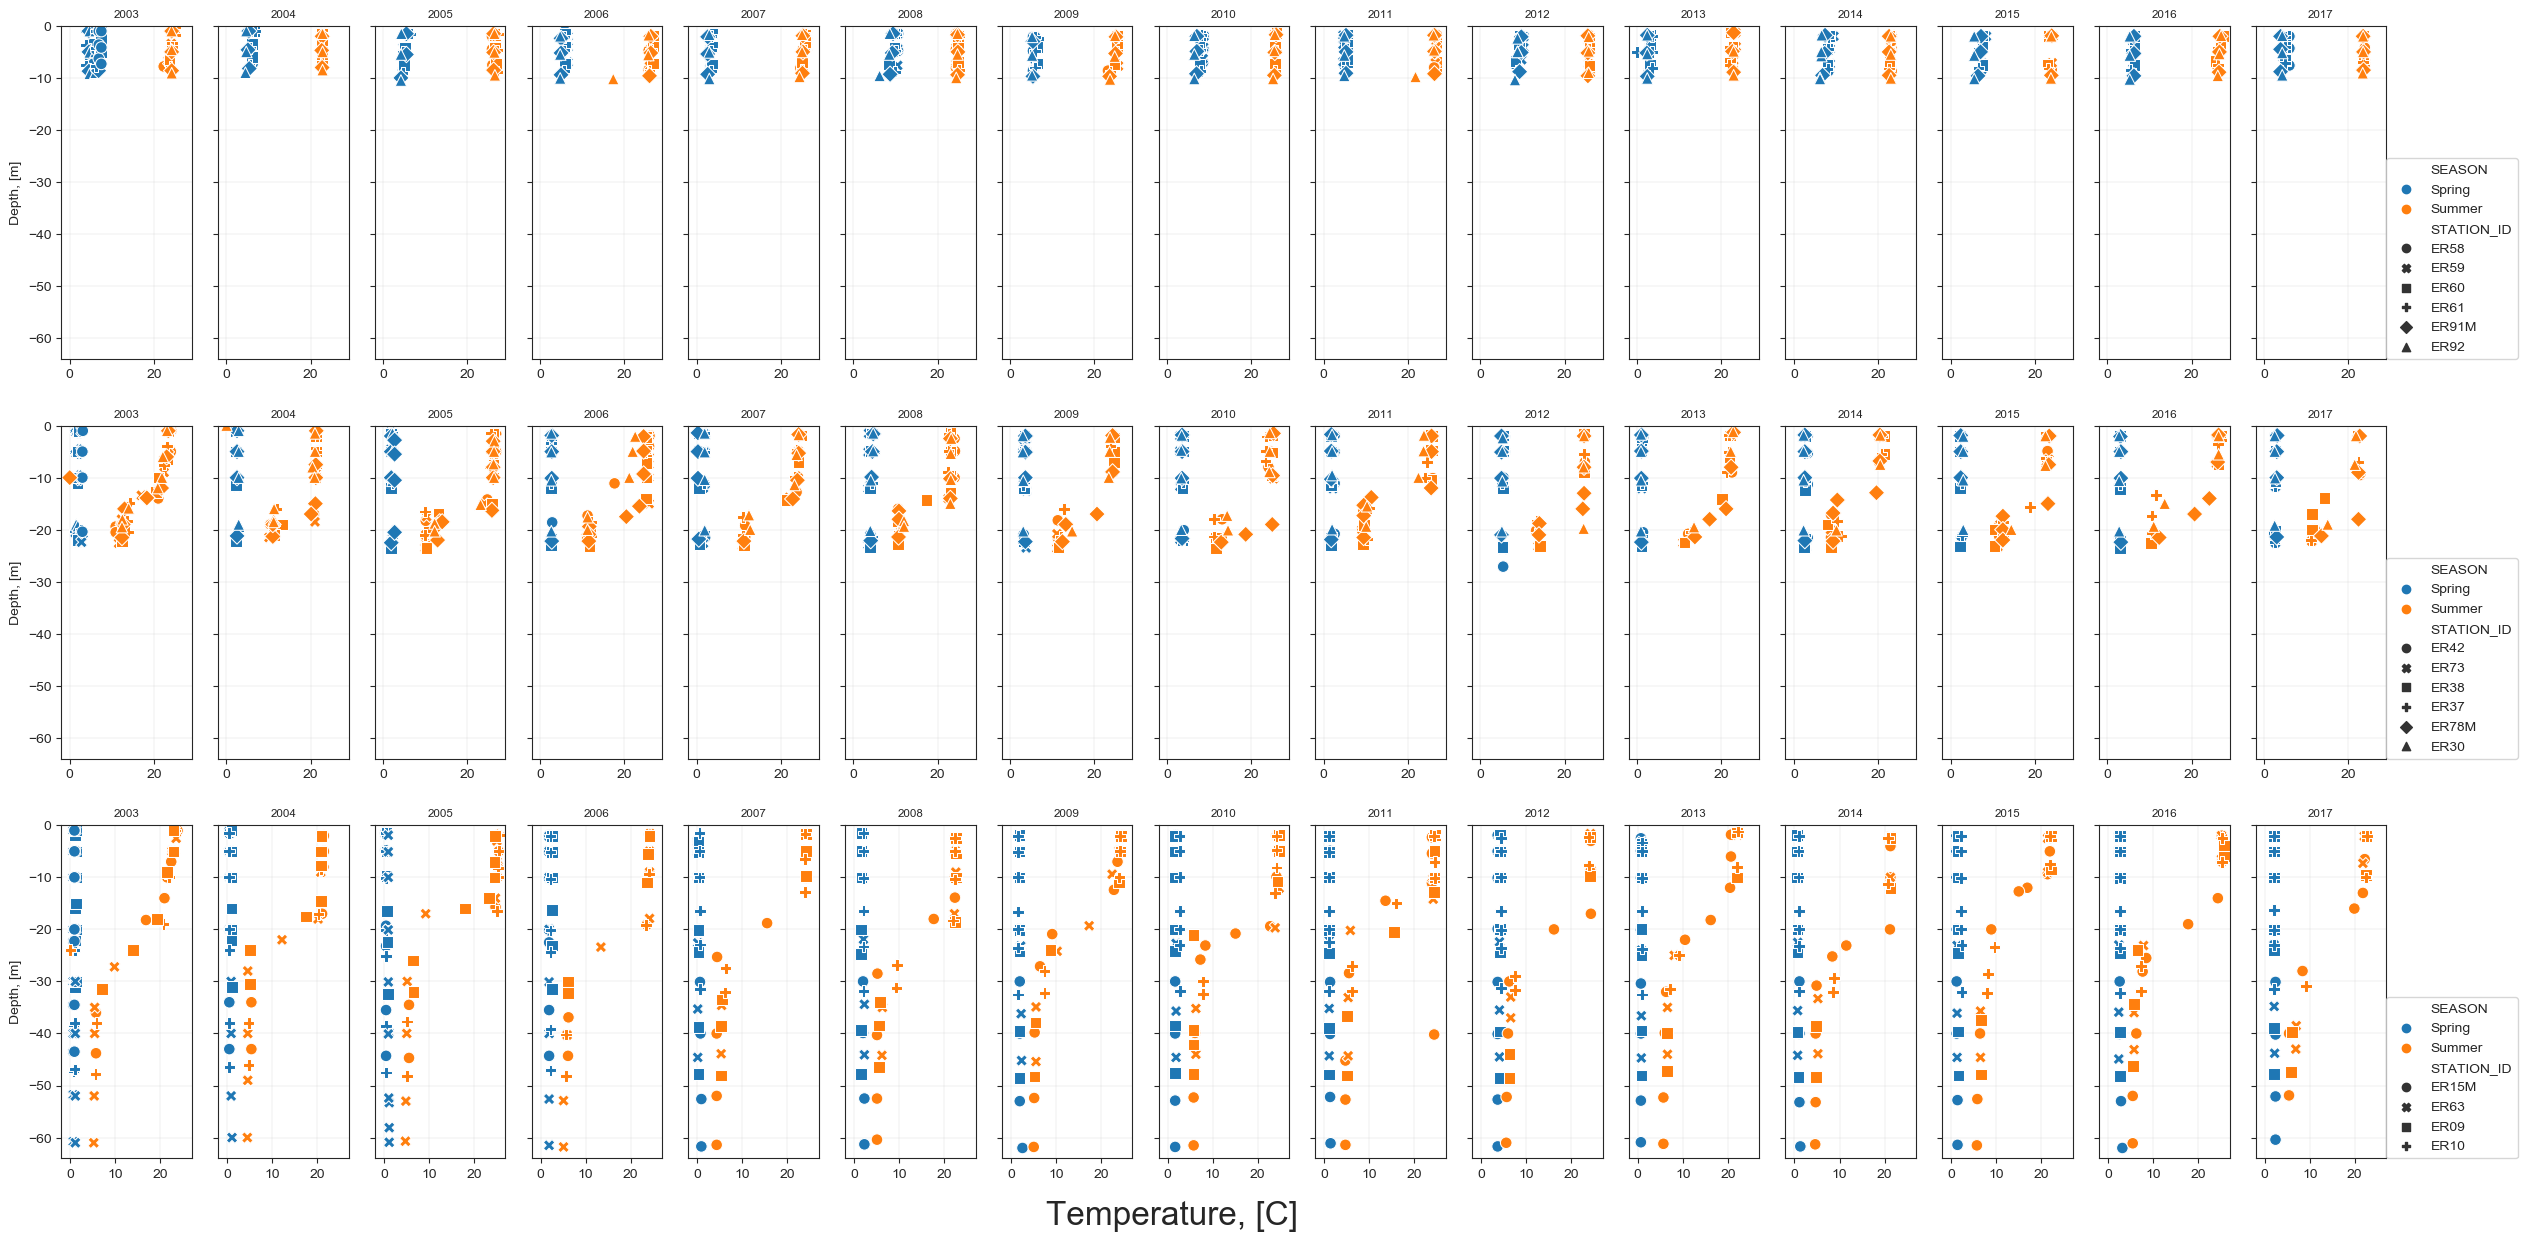

In [31]:
# %matplotlib osx
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = Temp[(Temp['STATION_ID'].isin(b)) & (Temp['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
            tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
            unew = np.arange(xold.min(), xold.max(), 1)
            out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alpha=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

axes[2][2].set_xlim(16,18)
axes[2][0].set_xlim(16,17.5)

limits = []
for line in axes:
    low = [a.get_xlim()[0] for a in line]
    high = [a.get_xlim()[1] for a in line]
    limits.append((np.floor(min(low)),np.ceil(max(high))))
    
for i,ax in enumerate(axes[0]):
    axes[0][i].set_xlim(limits[0])
    axes[1][i].set_xlim(limits[1])
    axes[2][i].set_xlim(limits[2])
#     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
# axes[2][0].text(8.5,-0.2, 'Chloride concnetrations, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/Chloride_mgL_16_20.pdf')



axes[2][0].text(8.5,-0.2, 'Temperature, [C]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# plt.draw()
# f.savefig('Mass Balance/GLENDA/All Stations/Temperature_C.pdf')

In [32]:
Alk = pd.read_csv('../../measurements/GLNPO/Mass Balance/Alk.csv')
Alk = Alk[Alk.QC_TYPE=='routine field sample']
Alk = Alk[~Alk.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
Alk = Alk[Alk.YEAR>2002]
Alk.loc[:,'SAMPLE_DEPTH_M'] *= -1
Alk = Alk[Alk['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
Alk = Alk[Alk['SEASON'].isin(seasons)]
Alk['VALUE_1'] = pd.to_numeric(Alk['VALUE_1'], errors='coerce')

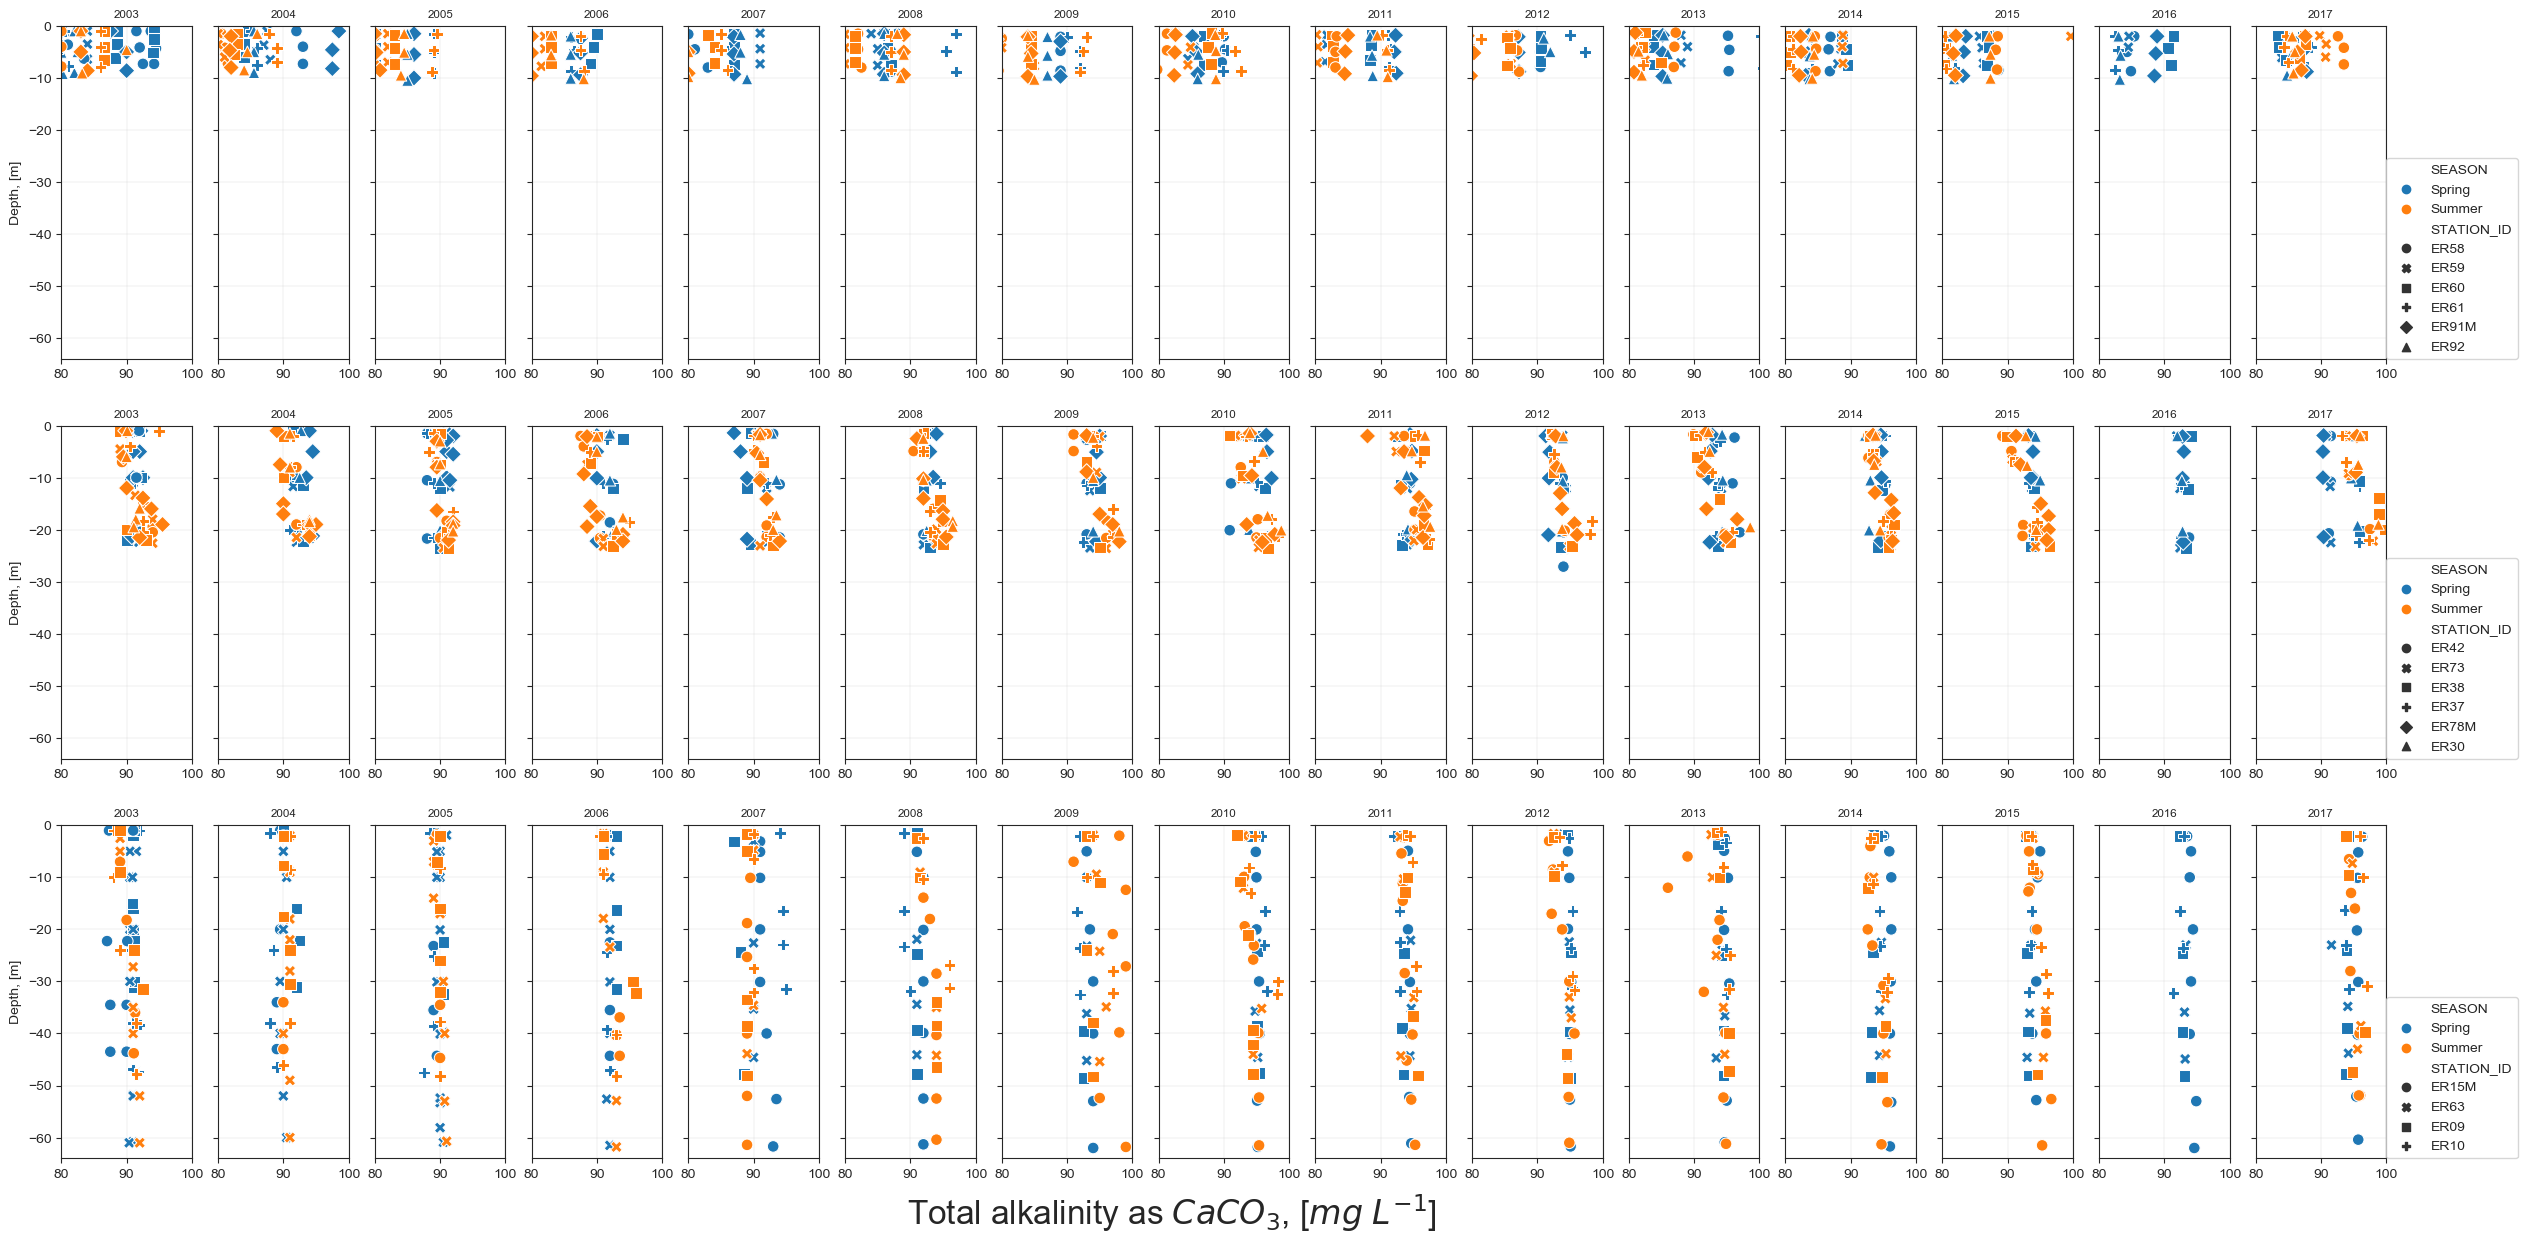

In [45]:
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = Alk[(Alk['STATION_ID'].isin(b)) & (Alk['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alpha=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

# limits = []
# for line in axes:
#     low = [a.get_xlim()[0] for a in line]
#     high = [a.get_xlim()[1] for a in line]
#     limits.append((np.floor(min(low)),np.ceil(max(high))))
    
for i,ax in enumerate(axes[0]):
#     axes[0][i].set_xlim(limits[0])
#     axes[1][i].set_xlim(limits[1])
#     axes[2][i].set_xlim(limits[2])
    axes[0][i].set_xlim(80,100)
    axes[1][i].set_xlim(80,100)
    axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Total alkalinity as $CaCO_3$, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/Tot_alkalinity_80_100.pdf')

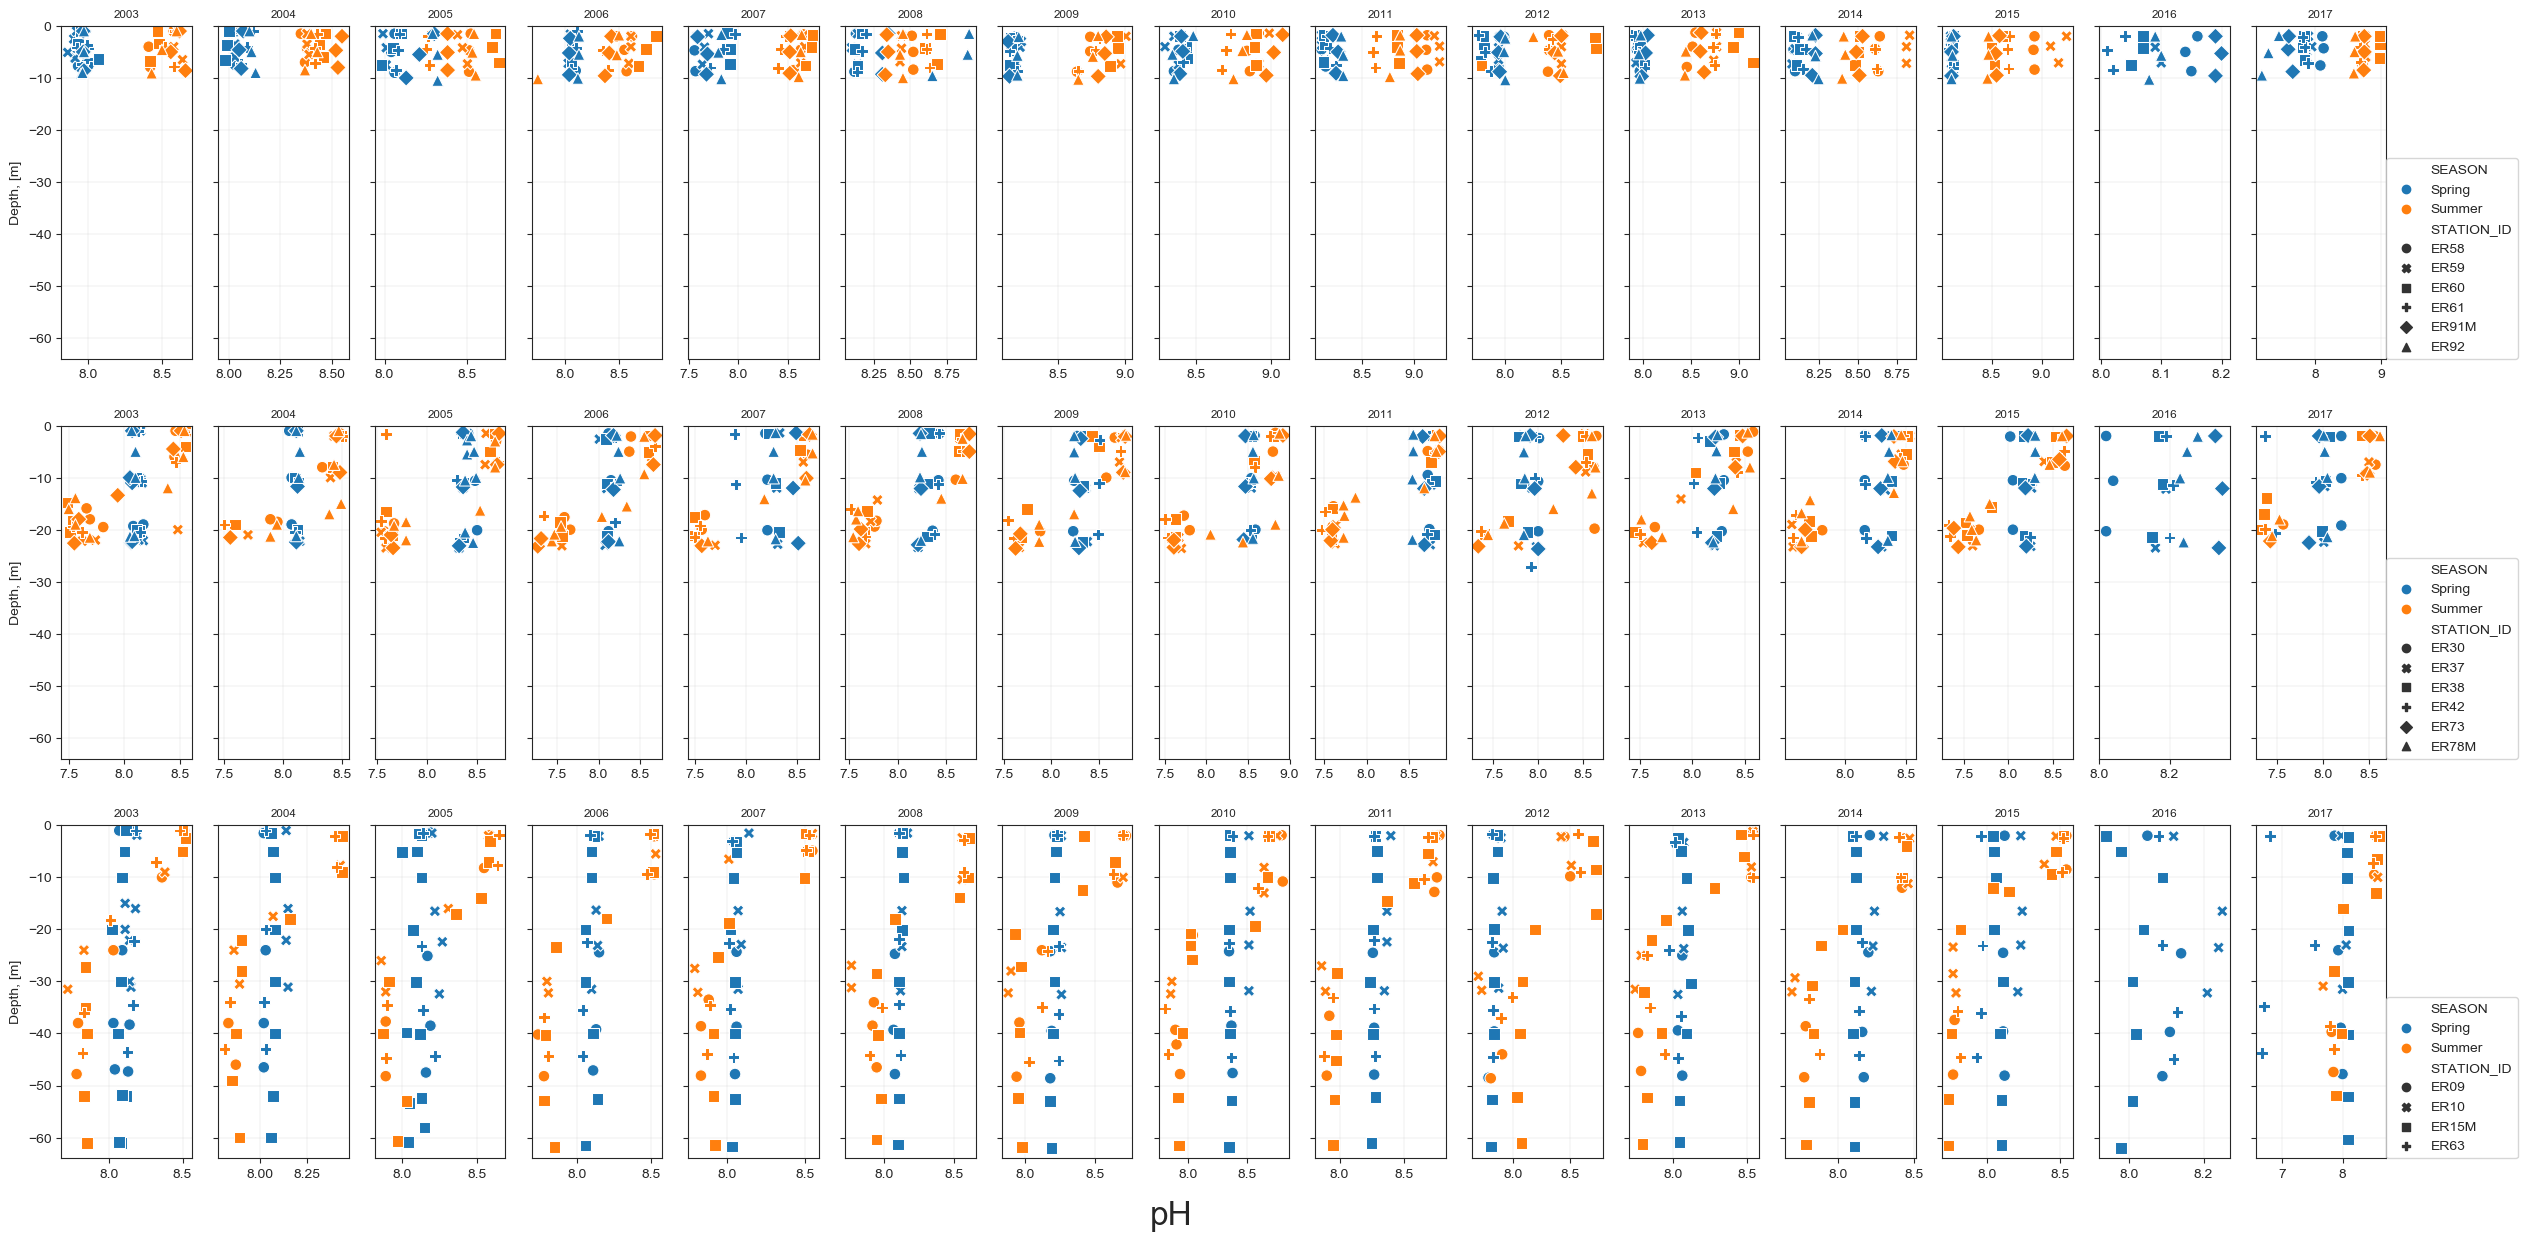

In [88]:
pH = pd.read_csv('../../measurements/GLNPO/Mass Balance/pH.csv')
pH = pH[pH.QC_TYPE=='routine field sample']
pH = pH[~pH.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
pH = pH[pH.YEAR>2002]
pH.loc[:,'SAMPLE_DEPTH_M'] *= -1
pH = pH[pH['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
pH = pH[pH['SEASON'].isin(seasons)]
pH['VALUE_1'] = pd.to_numeric(pH['VALUE_1'], errors='coerce')
# pH = pH[pH['VALUE_1']>50]
pH = pH.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = pH[(pH['STATION_ID'].isin(b)) & (pH['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alpha=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
#             axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

# limits = []
# for line in axes:
#     low = [a.get_xlim()[0] for a in line]
#     high = [a.get_xlim()[1] for a in line]
#     limits.append((np.floor(min(low)),np.ceil(max(high))))
    
# for i,ax in enumerate(axes[0]):
#     axes[0][i].set_xlim(limits[0])
#     axes[1][i].set_xlim(limits[1])
#     axes[2][i].set_xlim(limits[2])
#     axes[0][i].set_xlim(80,100)
#     axes[1][i].set_xlim(80,100)
#     axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'pH', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
f.savefig('Mass Balance/GLENDA/All Stations/pH_no_scale.pdf')

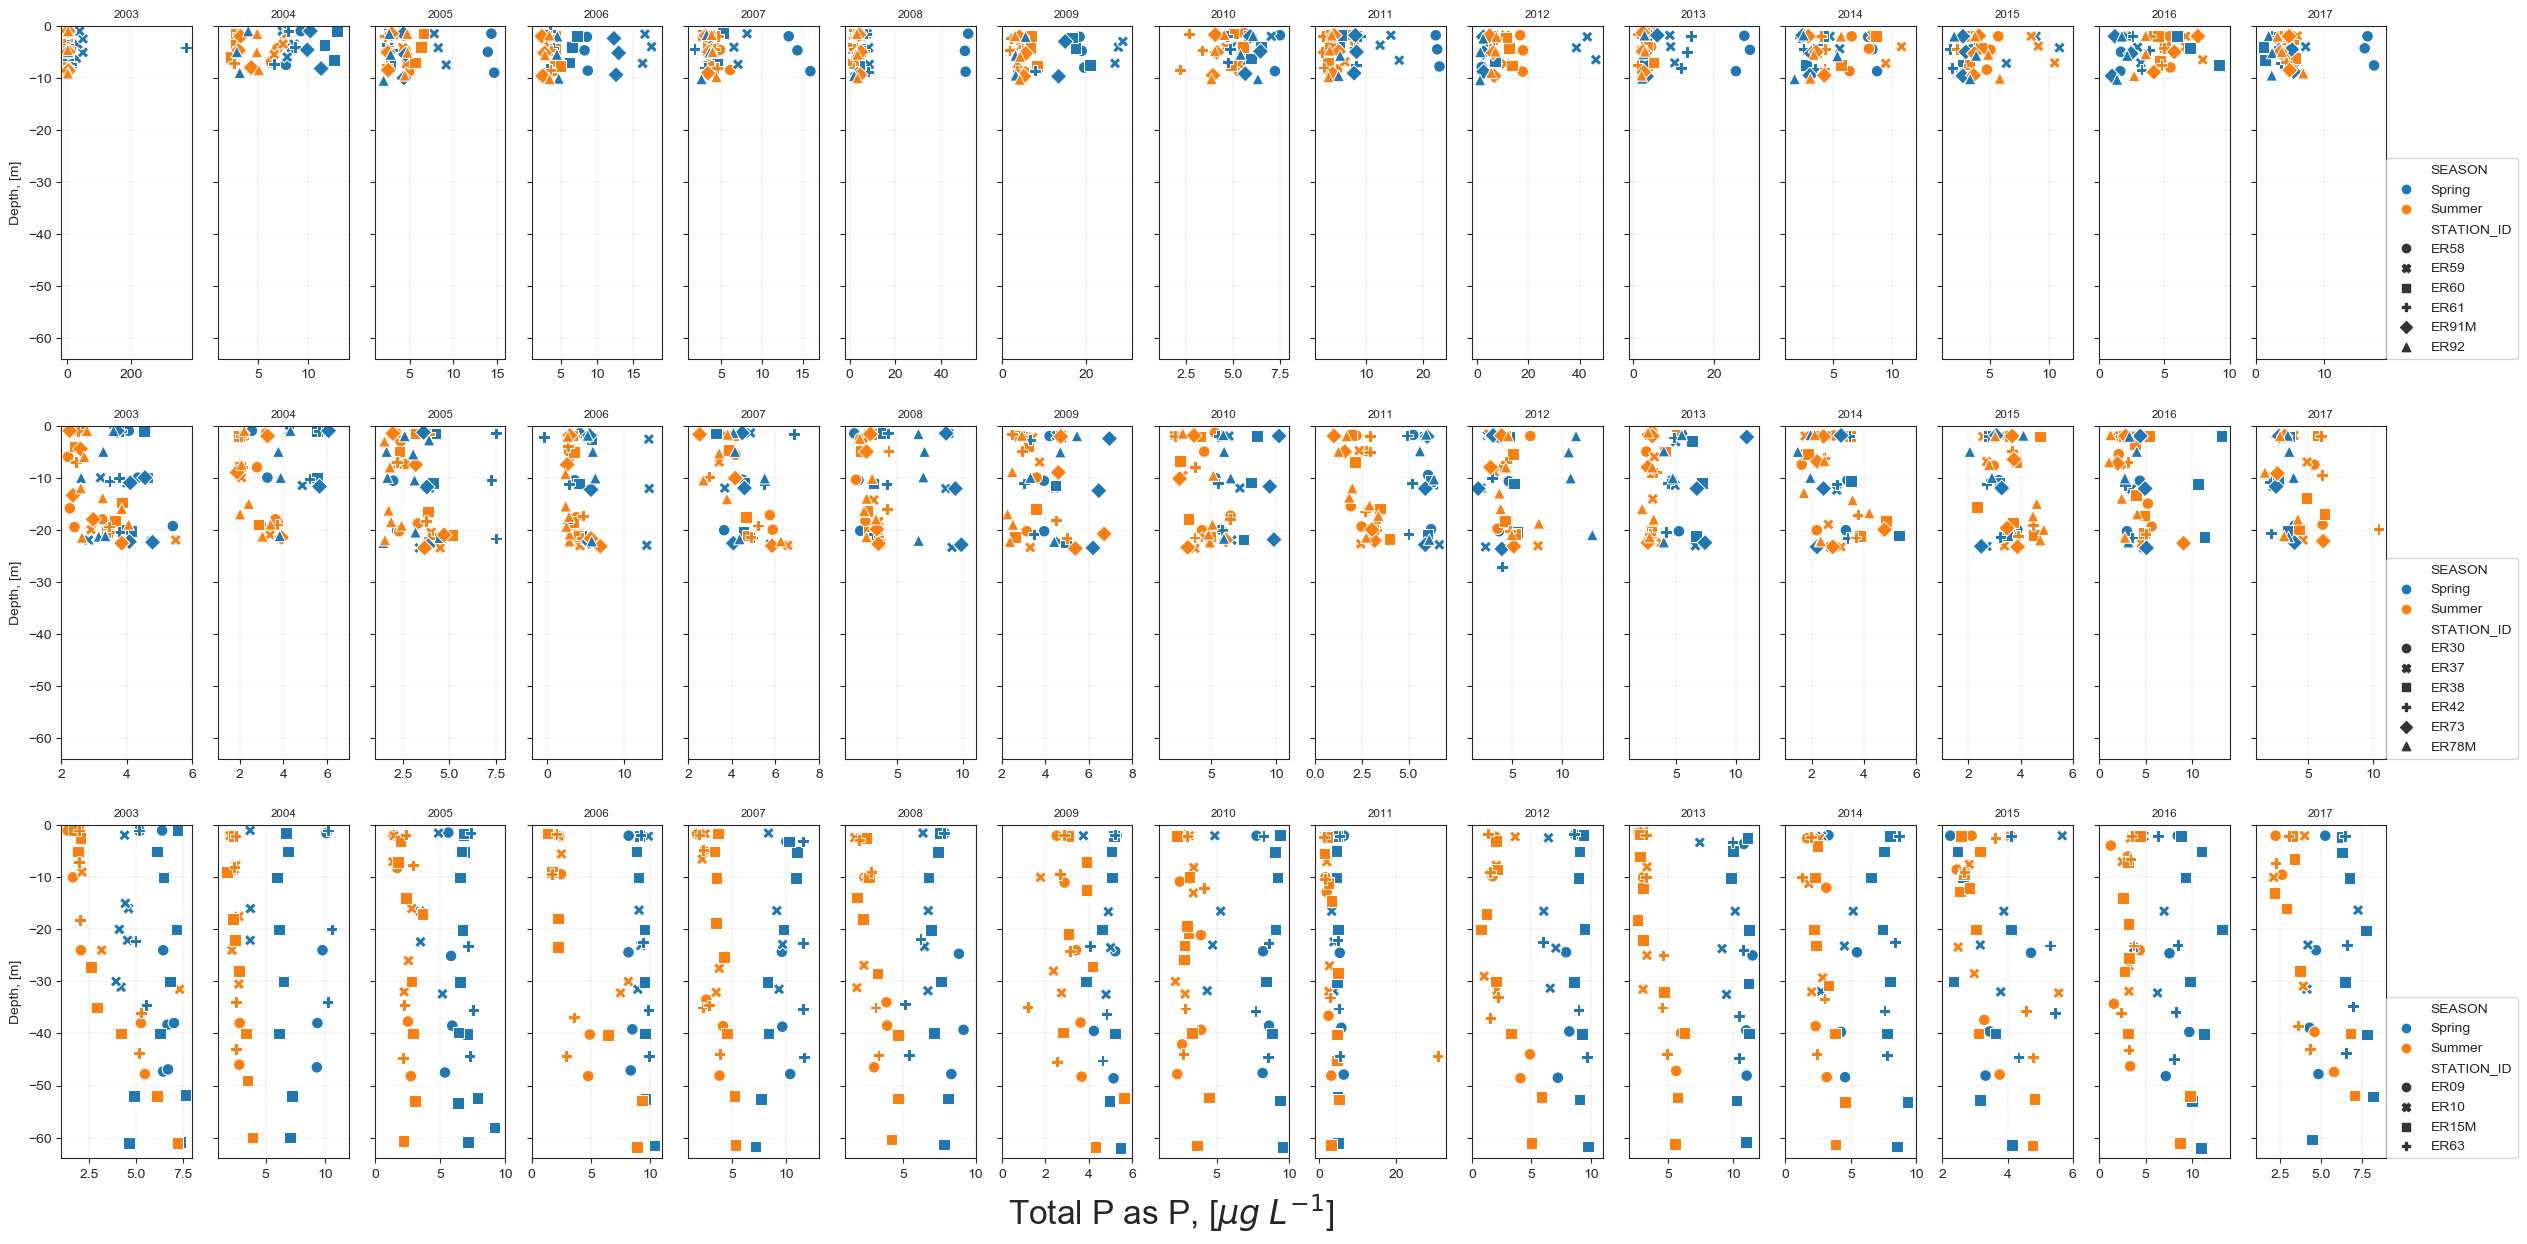

In [85]:
TOTP = pd.read_csv('../../measurements/GLNPO/Mass Balance/TOTP.csv')
TOTP = TOTP[TOTP.QC_TYPE=='routine field sample']
TOTP = TOTP[~TOTP.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
TOTP = TOTP[TOTP.YEAR>2002]
TOTP.loc[:,'SAMPLE_DEPTH_M'] *= -1
TOTP = TOTP[TOTP['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
TOTP = TOTP[TOTP['SEASON'].isin(seasons)]
TOTP['VALUE_1'] = pd.to_numeric(TOTP['VALUE_1'], errors='coerce')
# TOTP = TOTP[TOTP['VALUE_1']>50]
TOTP = TOTP.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = TOTP[(TOTP['STATION_ID'].isin(b)) & (TOTP['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alTOTPa=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

limits = []
for line in axes:
    low = [a.get_xlim()[0] for a in line]
    high = [a.get_xlim()[1] for a in line]
    limits.append((np.floor(min(low)),np.ceil(max(high))))
    
for i,ax in enumerate(axes[0]):
    axes[0][i].set_xlim(limits[0])
    axes[1][i].set_xlim(limits[1])
    axes[2][i].set_xlim(limits[2])
    axes[0][i].set_xlim(0,20)
    axes[1][i].set_xlim(0,13)
    axes[2][i].set_xlim(0,13)
#     axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')

axes[2][0].text(8.5,-0.2, 'Total P as P, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/TOTP_ugL.pdf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


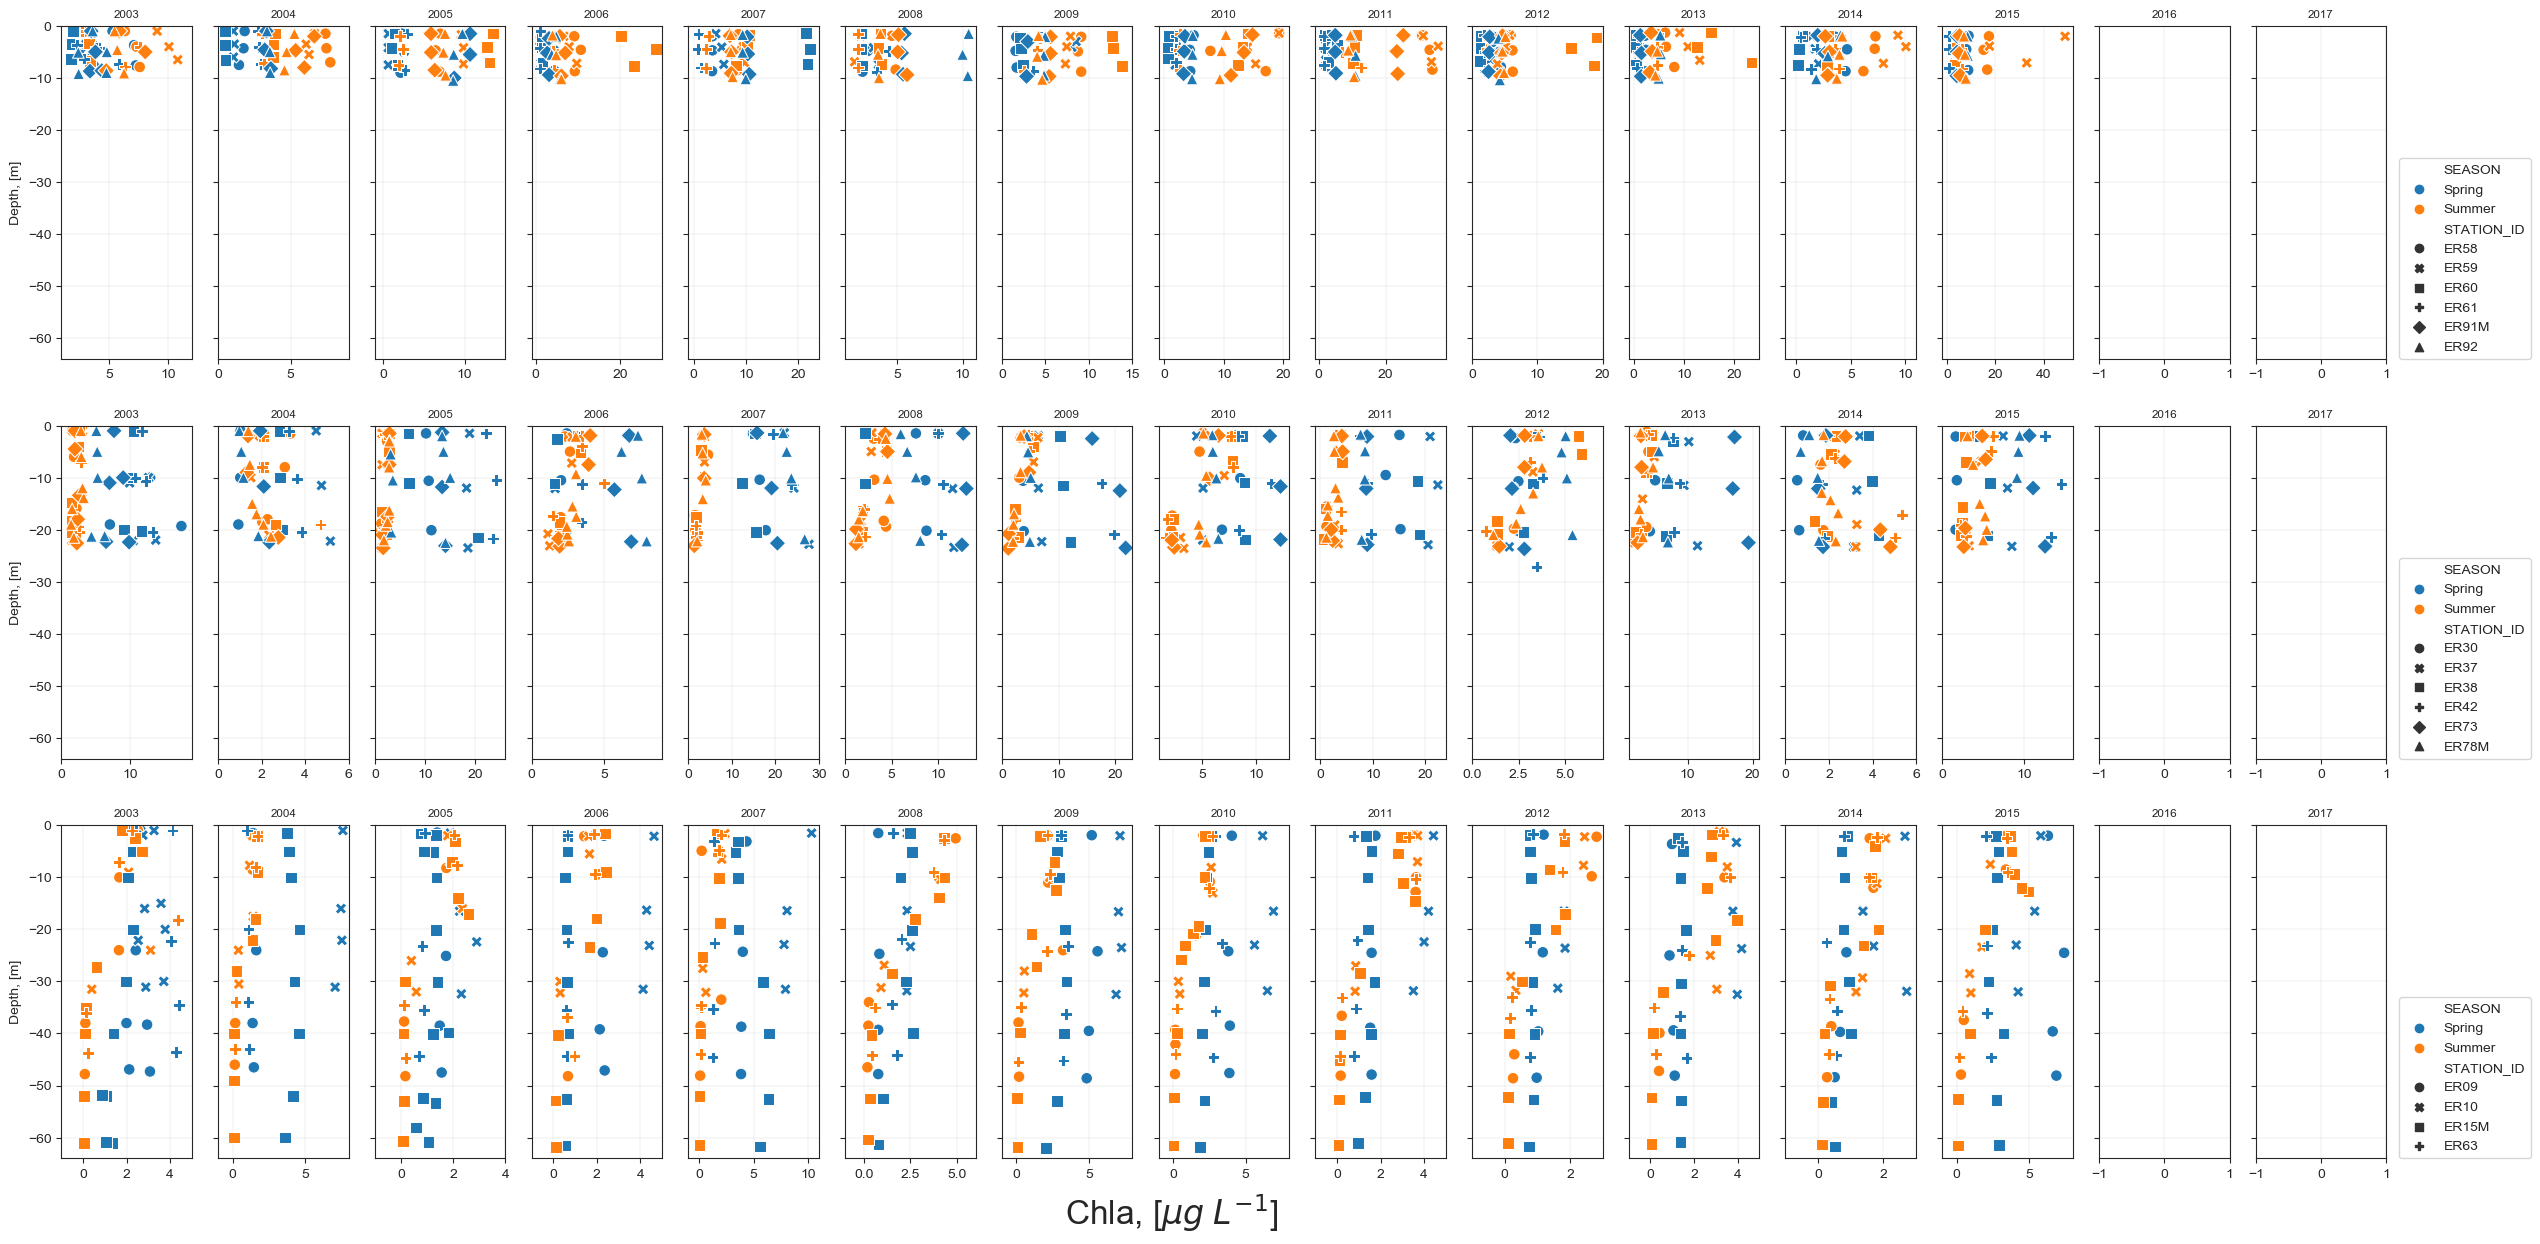

In [84]:
Chla = pd.read_csv('../../measurements/GLNPO/Mass Balance/Chla.csv')
Chla = Chla[Chla.QC_TYPE=='routine field sample']
Chla = Chla[~Chla.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
Chla = Chla[Chla.YEAR>2002]
Chla.loc[:,'SAMPLE_DEPTH_M'] *= -1
Chla = Chla[Chla['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
Chla = Chla[Chla['SEASON'].isin(seasons)]
Chla['VALUE_1'] = pd.to_numeric(Chla['VALUE_1'], errors='coerce')
# Chla = Chla[Chla['VALUE_1']>50]
Chla = Chla.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = Chla[(Chla['STATION_ID'].isin(b)) & (Chla['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alChlaa=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][12].legend(loc=(3.5,0))
axes[1][12].legend(loc=(3.5,0))
axes[2][12].legend(loc=(3.5,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

limits = []
for line in axes:
    low = [a.get_xlim()[0] for a in line]
    high = [a.get_xlim()[1] for a in line]
    limits.append((np.floor(min(low)),np.ceil(max(high))))
    
for i,ax in enumerate(axes[0]):
    axes[0][i].set_xlim(limits[0])
    axes[1][i].set_xlim(limits[1])
    axes[2][i].set_xlim(limits[2])
#     axes[0][i].set_xlim(0,20)
#     axes[1][i].set_xlim(0,13)
#     axes[2][i].set_xlim(0,13)
#     axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')


axes[2][0].text(8.5,-0.2, 'Chla, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/Chla_ugL.pdf')

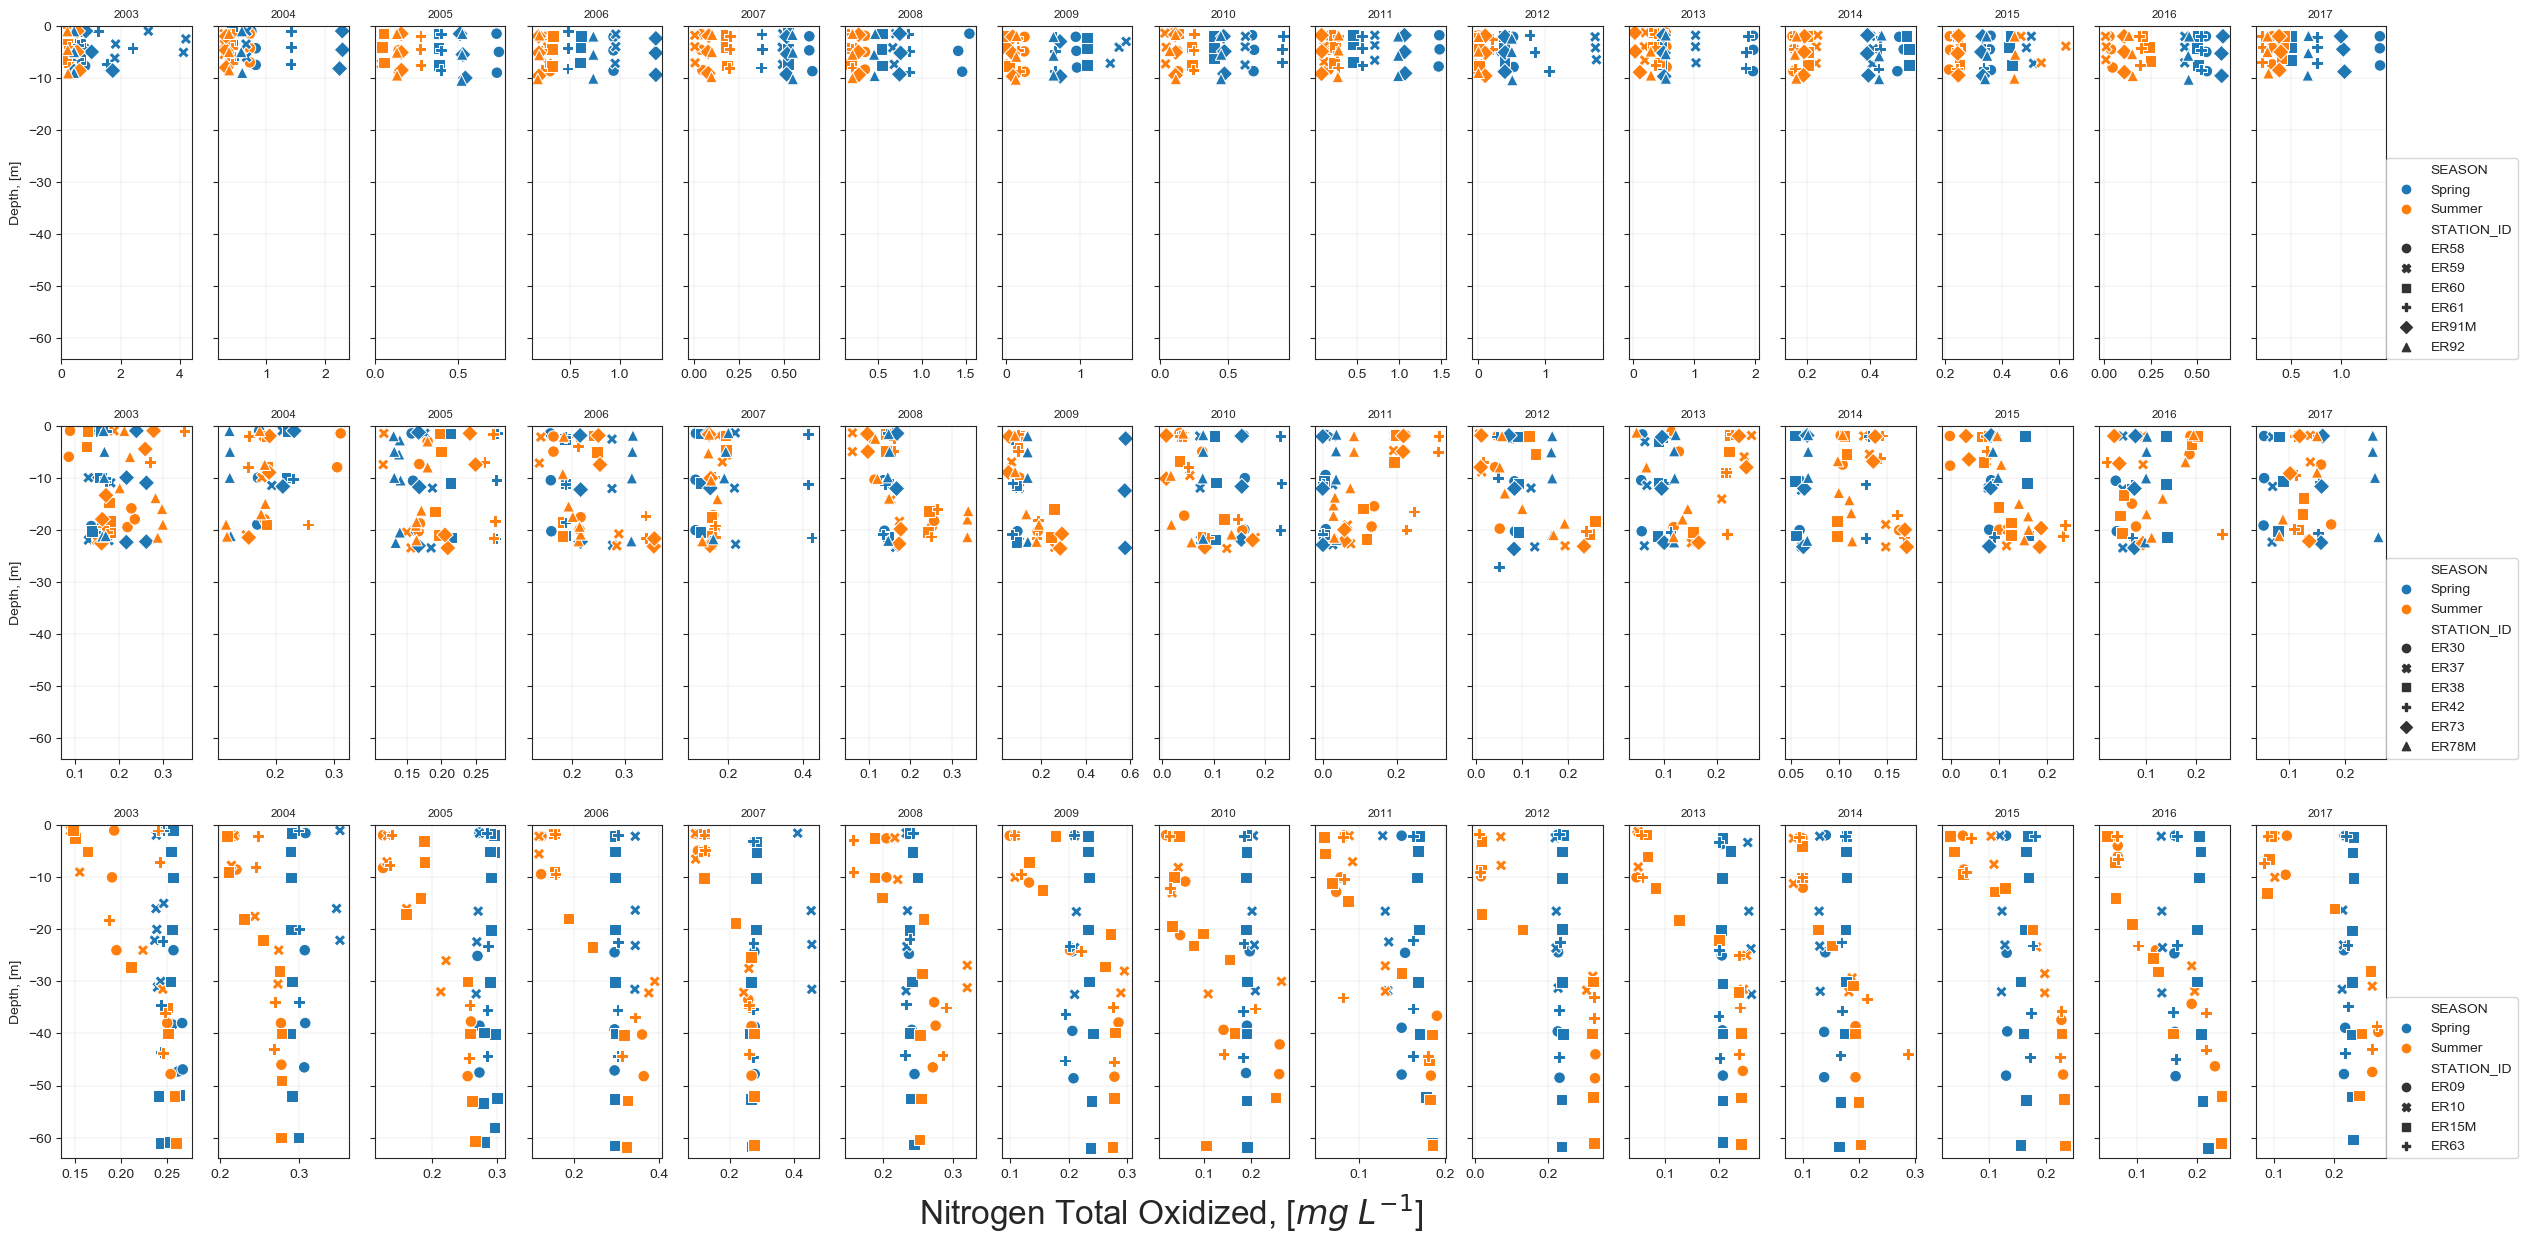

In [83]:
Ntot_oxidized = pd.read_csv('../../measurements/GLNPO/Mass Balance/Ntot_oxidized.csv')
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized.QC_TYPE=='routine field sample']
Ntot_oxidized = Ntot_oxidized[~Ntot_oxidized.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized.YEAR>2002]
Ntot_oxidized.loc[:,'SAMPLE_DEPTH_M'] *= -1
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['SEASON'].isin(seasons)]
Ntot_oxidized['VALUE_1'] = pd.to_numeric(Ntot_oxidized['VALUE_1'], errors='coerce')
# Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['VALUE_1']>50]
Ntot_oxidized = Ntot_oxidized.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = Ntot_oxidized[(Ntot_oxidized['STATION_ID'].isin(b)) & (Ntot_oxidized['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alNtot_oxidizeda=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
#             axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

# limits = []
# for line in axes:
#     low = [a.get_xlim()[0] for a in line]
#     high = [a.get_xlim()[1] for a in line]
#     limits.append((min(low),max(high)))
    
# for i,ax in enumerate(axes[0]):
#     axes[0][i].set_xlim(limits[0])
#     axes[1][i].set_xlim(limits[1])
#     axes[2][i].set_xlim(limits[2])
#     axes[0][i].set_xlim(0,20)
#     axes[1][i].set_xlim(0,13)
#     axes[2][i].set_xlim(0,13)
#     axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')

axes[2][0].text(8.5,-0.2, 'Nitrogen Total Oxidized, [$m g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
f.savefig('Mass Balance/GLENDA/All Stations/Ntot_oxidized_mgL_no_scale.pdf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

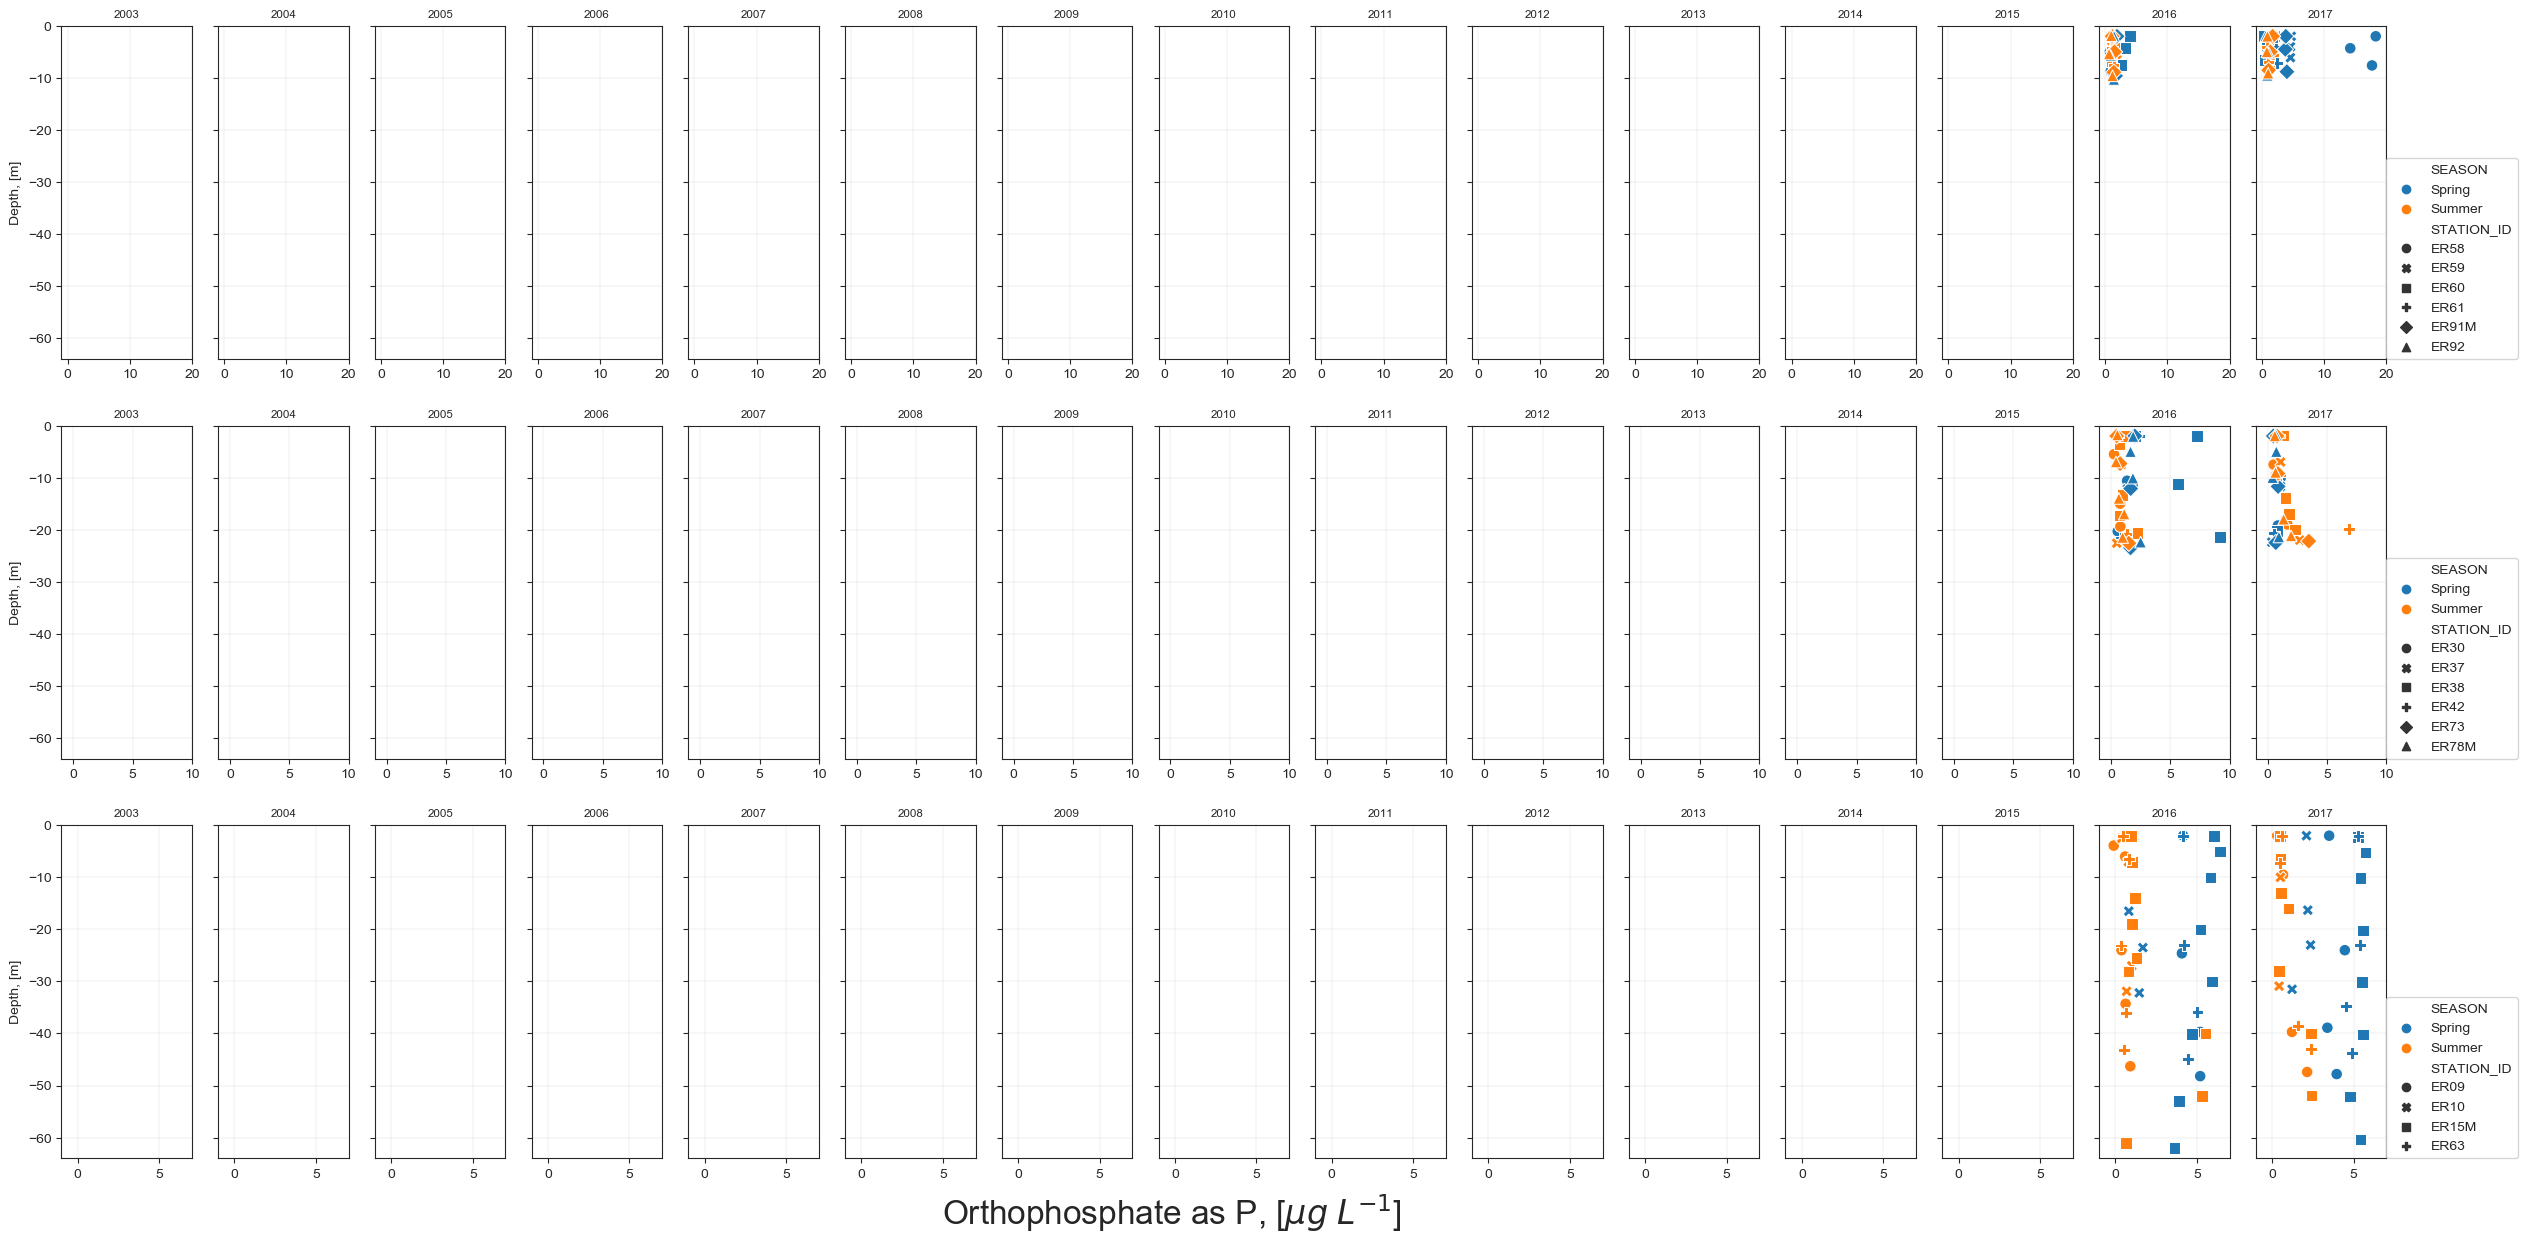

In [73]:
orthoP = pd.read_csv('../../measurements/GLNPO/Mass Balance/orthoP.csv')
orthoP = orthoP[orthoP.QC_TYPE=='routine field sample']
orthoP = orthoP[~orthoP.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
orthoP = orthoP[orthoP.YEAR>2002]
orthoP.loc[:,'SAMPLE_DEPTH_M'] *= -1
orthoP = orthoP[orthoP['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
orthoP = orthoP[orthoP['SEASON'].isin(seasons)]
orthoP['VALUE_1'] = pd.to_numeric(orthoP['VALUE_1'], errors='coerce')
# orthoP = orthoP[orthoP['VALUE_1']>50]
orthoP = orthoP.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = orthoP[(orthoP['STATION_ID'].isin(b)) & (orthoP['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alorthoPa=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

limits = []
for line in axes:
    low = [a.get_xlim()[0] for a in line]
    high = [a.get_xlim()[1] for a in line]
    limits.append((np.floor(min(low)),np.ceil(max(high))))
    
for i,ax in enumerate(axes[0]):
    axes[0][i].set_xlim(limits[0])
    axes[1][i].set_xlim(limits[1])
    axes[2][i].set_xlim(limits[2])
#     axes[0][i].set_xlim(0,20)
#     axes[1][i].set_xlim(0,13)
#     axes[2][i].set_xlim(0,13)
#     axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')

axes[2][0].text(8.5,-0.2, 'Orthophosphate as P, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/orthoP_ugL.pdf')

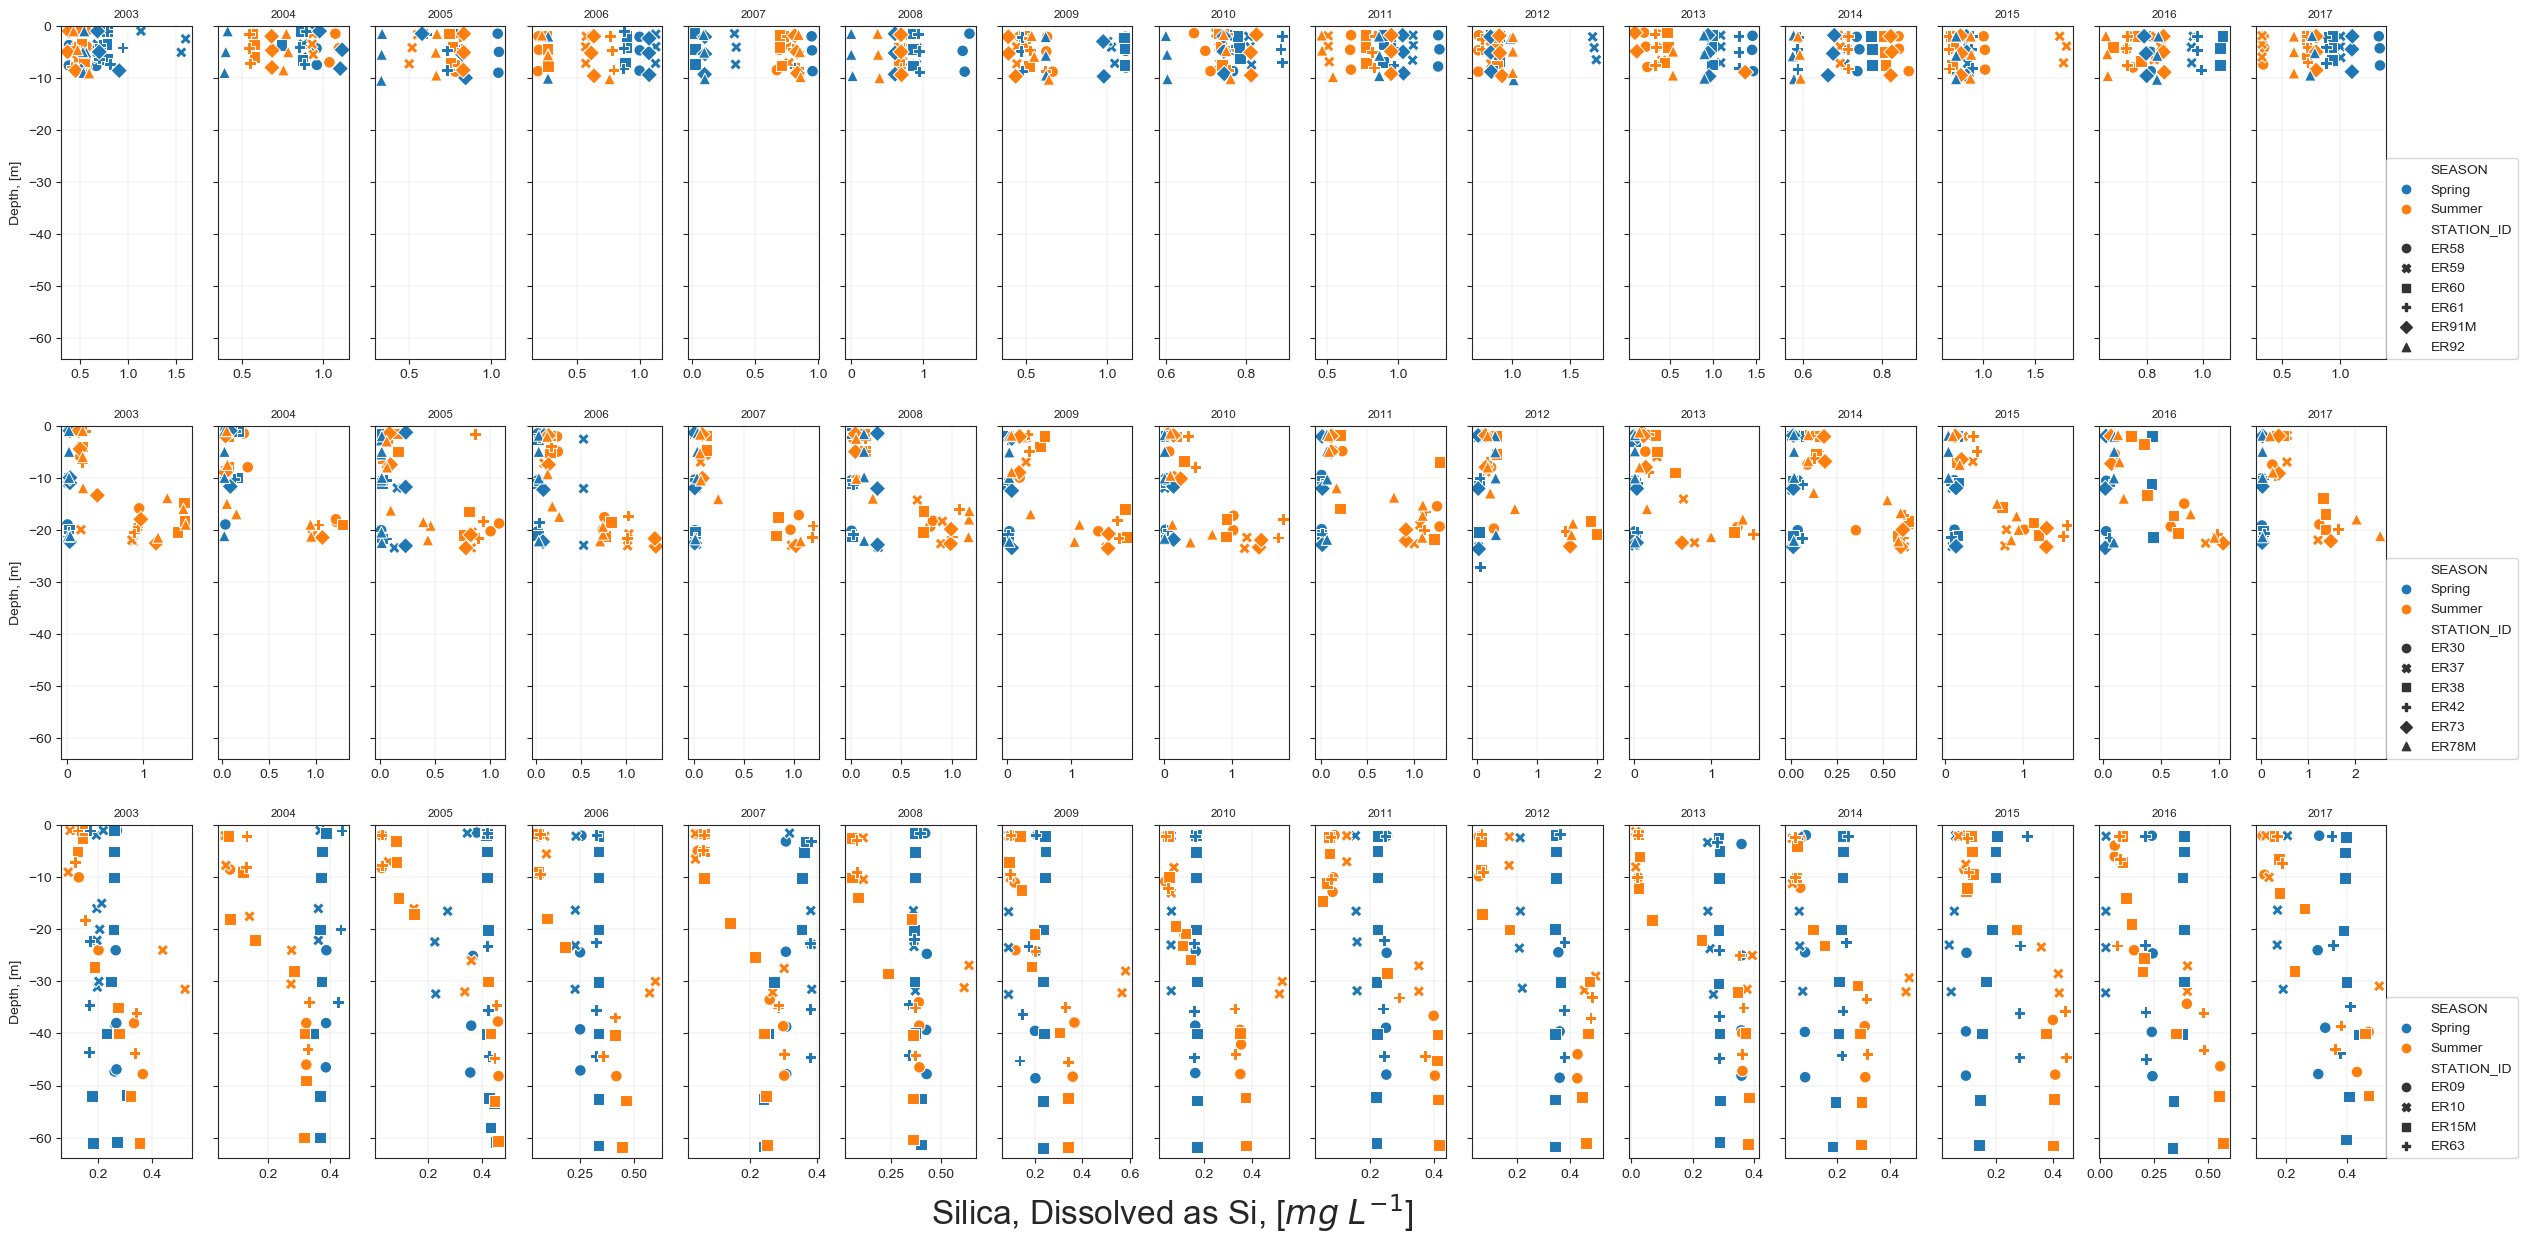

In [82]:
SilicaDissAsSi = pd.read_csv('../../measurements/GLNPO/Mass Balance/SilicaDissAsSi.csv')

SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi.QC_TYPE=='routine field sample']
SilicaDissAsSi = SilicaDissAsSi[~SilicaDissAsSi.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi.YEAR>2002]
SilicaDissAsSi.loc[:,'SAMPLE_DEPTH_M'] *= -1
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['SEASON'].isin(seasons)]
SilicaDissAsSi['VALUE_1'] = pd.to_numeric(SilicaDissAsSi['VALUE_1'], errors='coerce')
# SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['VALUE_1']>50]
SilicaDissAsSi = SilicaDissAsSi.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = SilicaDissAsSi[(SilicaDissAsSi['STATION_ID'].isin(b)) & (SilicaDissAsSi['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alSilicaDissAsSia=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
#             axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

# limits = []
# for line in axes:
#     low = [a.get_xlim()[0] for a in line]
#     high = [a.get_xlim()[1] for a in line]
#     limits.append((np.floor(min(low)),np.ceil(max(high))))
    
# for i,ax in enumerate(axes[0]):
#     axes[0][i].set_xlim(limits[0])
#     axes[1][i].set_xlim(limits[1])
#     axes[2][i].set_xlim(limits[2])
#     axes[0][i].set_xlim(0,2)
#     axes[1][i].set_xlim(0,2)
#     axes[2][i].set_xlim(0,1)
#     axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Silica, Dissolved as Si, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/SilicaDissAsSi_ugL_no_scale.pdf')

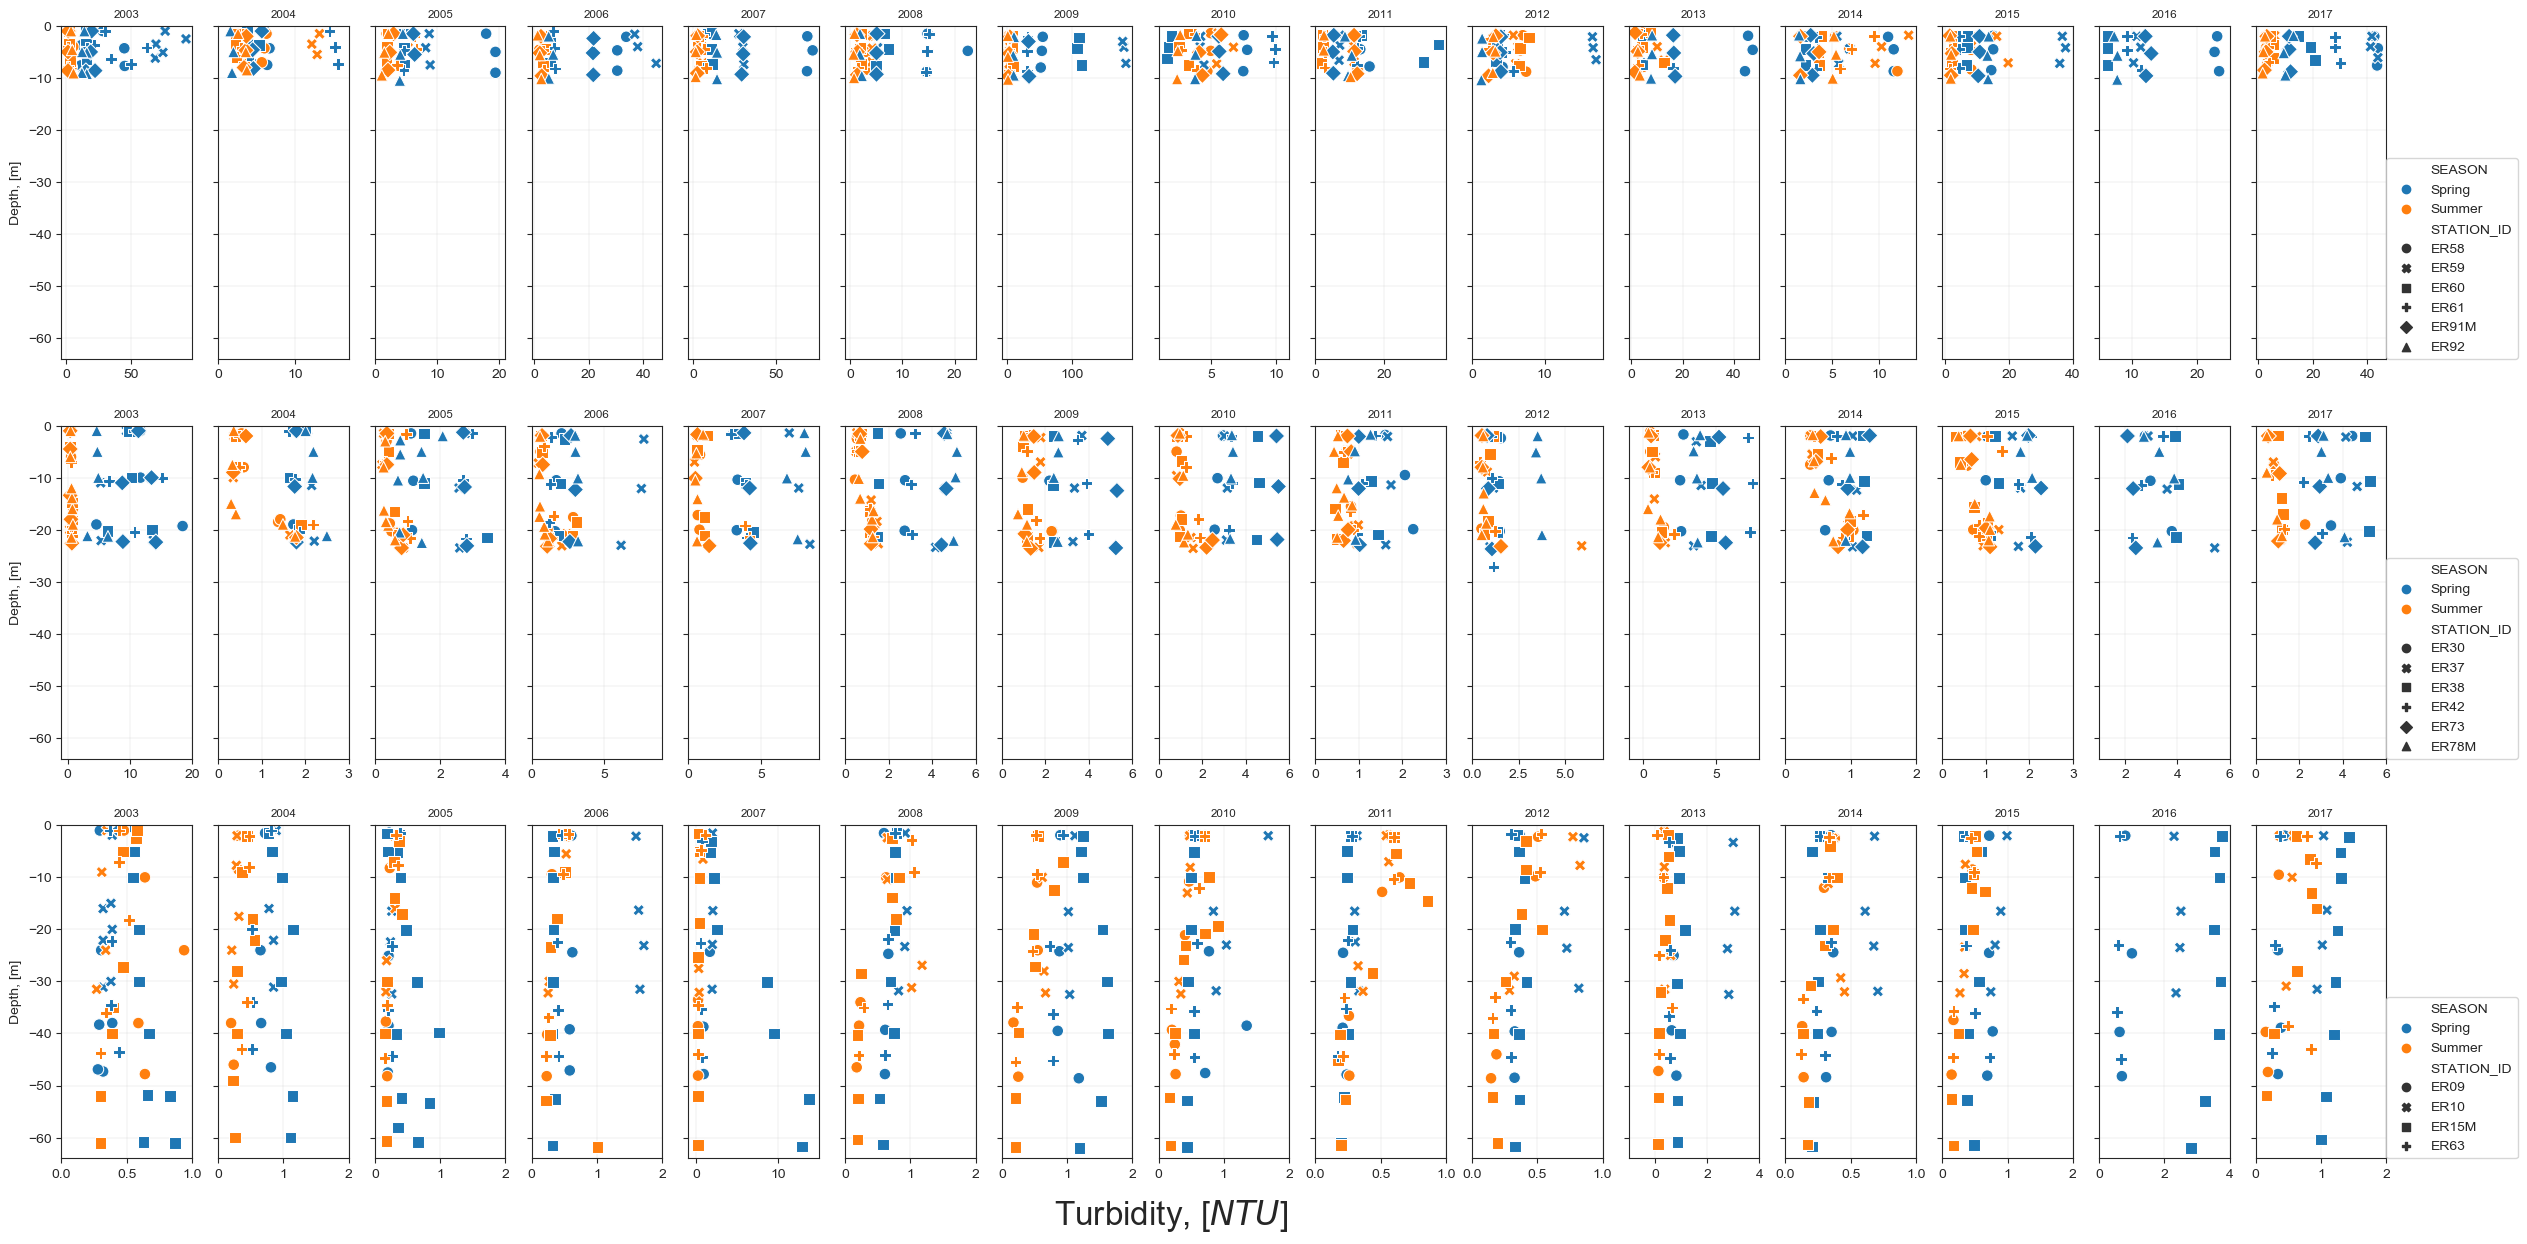

In [81]:
Turbidity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Turbidity.csv')
Turbidity = Turbidity[Turbidity.QC_TYPE=='routine field sample']
Turbidity = Turbidity[~Turbidity.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
Turbidity = Turbidity[Turbidity.YEAR>2002]
Turbidity.loc[:,'SAMPLE_DEPTH_M'] *= -1
Turbidity = Turbidity[Turbidity['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
Turbidity = Turbidity[Turbidity['SEASON'].isin(seasons)]
Turbidity['VALUE_1'] = pd.to_numeric(Turbidity['VALUE_1'], errors='coerce')
# Turbidity = Turbidity[Turbidity['VALUE_1']>50]
Turbidity = Turbidity.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = Turbidity[(Turbidity['STATION_ID'].isin(b)) & (Turbidity['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alTurbiditya=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

# limits = []
# for line in axes:
#     low = [a.get_xlim()[0] for a in line]
#     high = [a.get_xlim()[1] for a in line]
#     limits.append((np.floor(min(low)),np.ceil(max(high))))
    
# for i,ax in enumerate(axes[0]):
#     axes[0][i].set_xlim(limits[0])
#     axes[1][i].set_xlim(limits[1])
#     axes[2][i].set_xlim(limits[2])
#     axes[0][i].set_xlim(0,2)
#     axes[1][i].set_xlim(0,2)
#     axes[2][i].set_xlim(0,1)
#     axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Turbidity, [$NTU$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/Turbidity_NTU_no_scale.pdf')

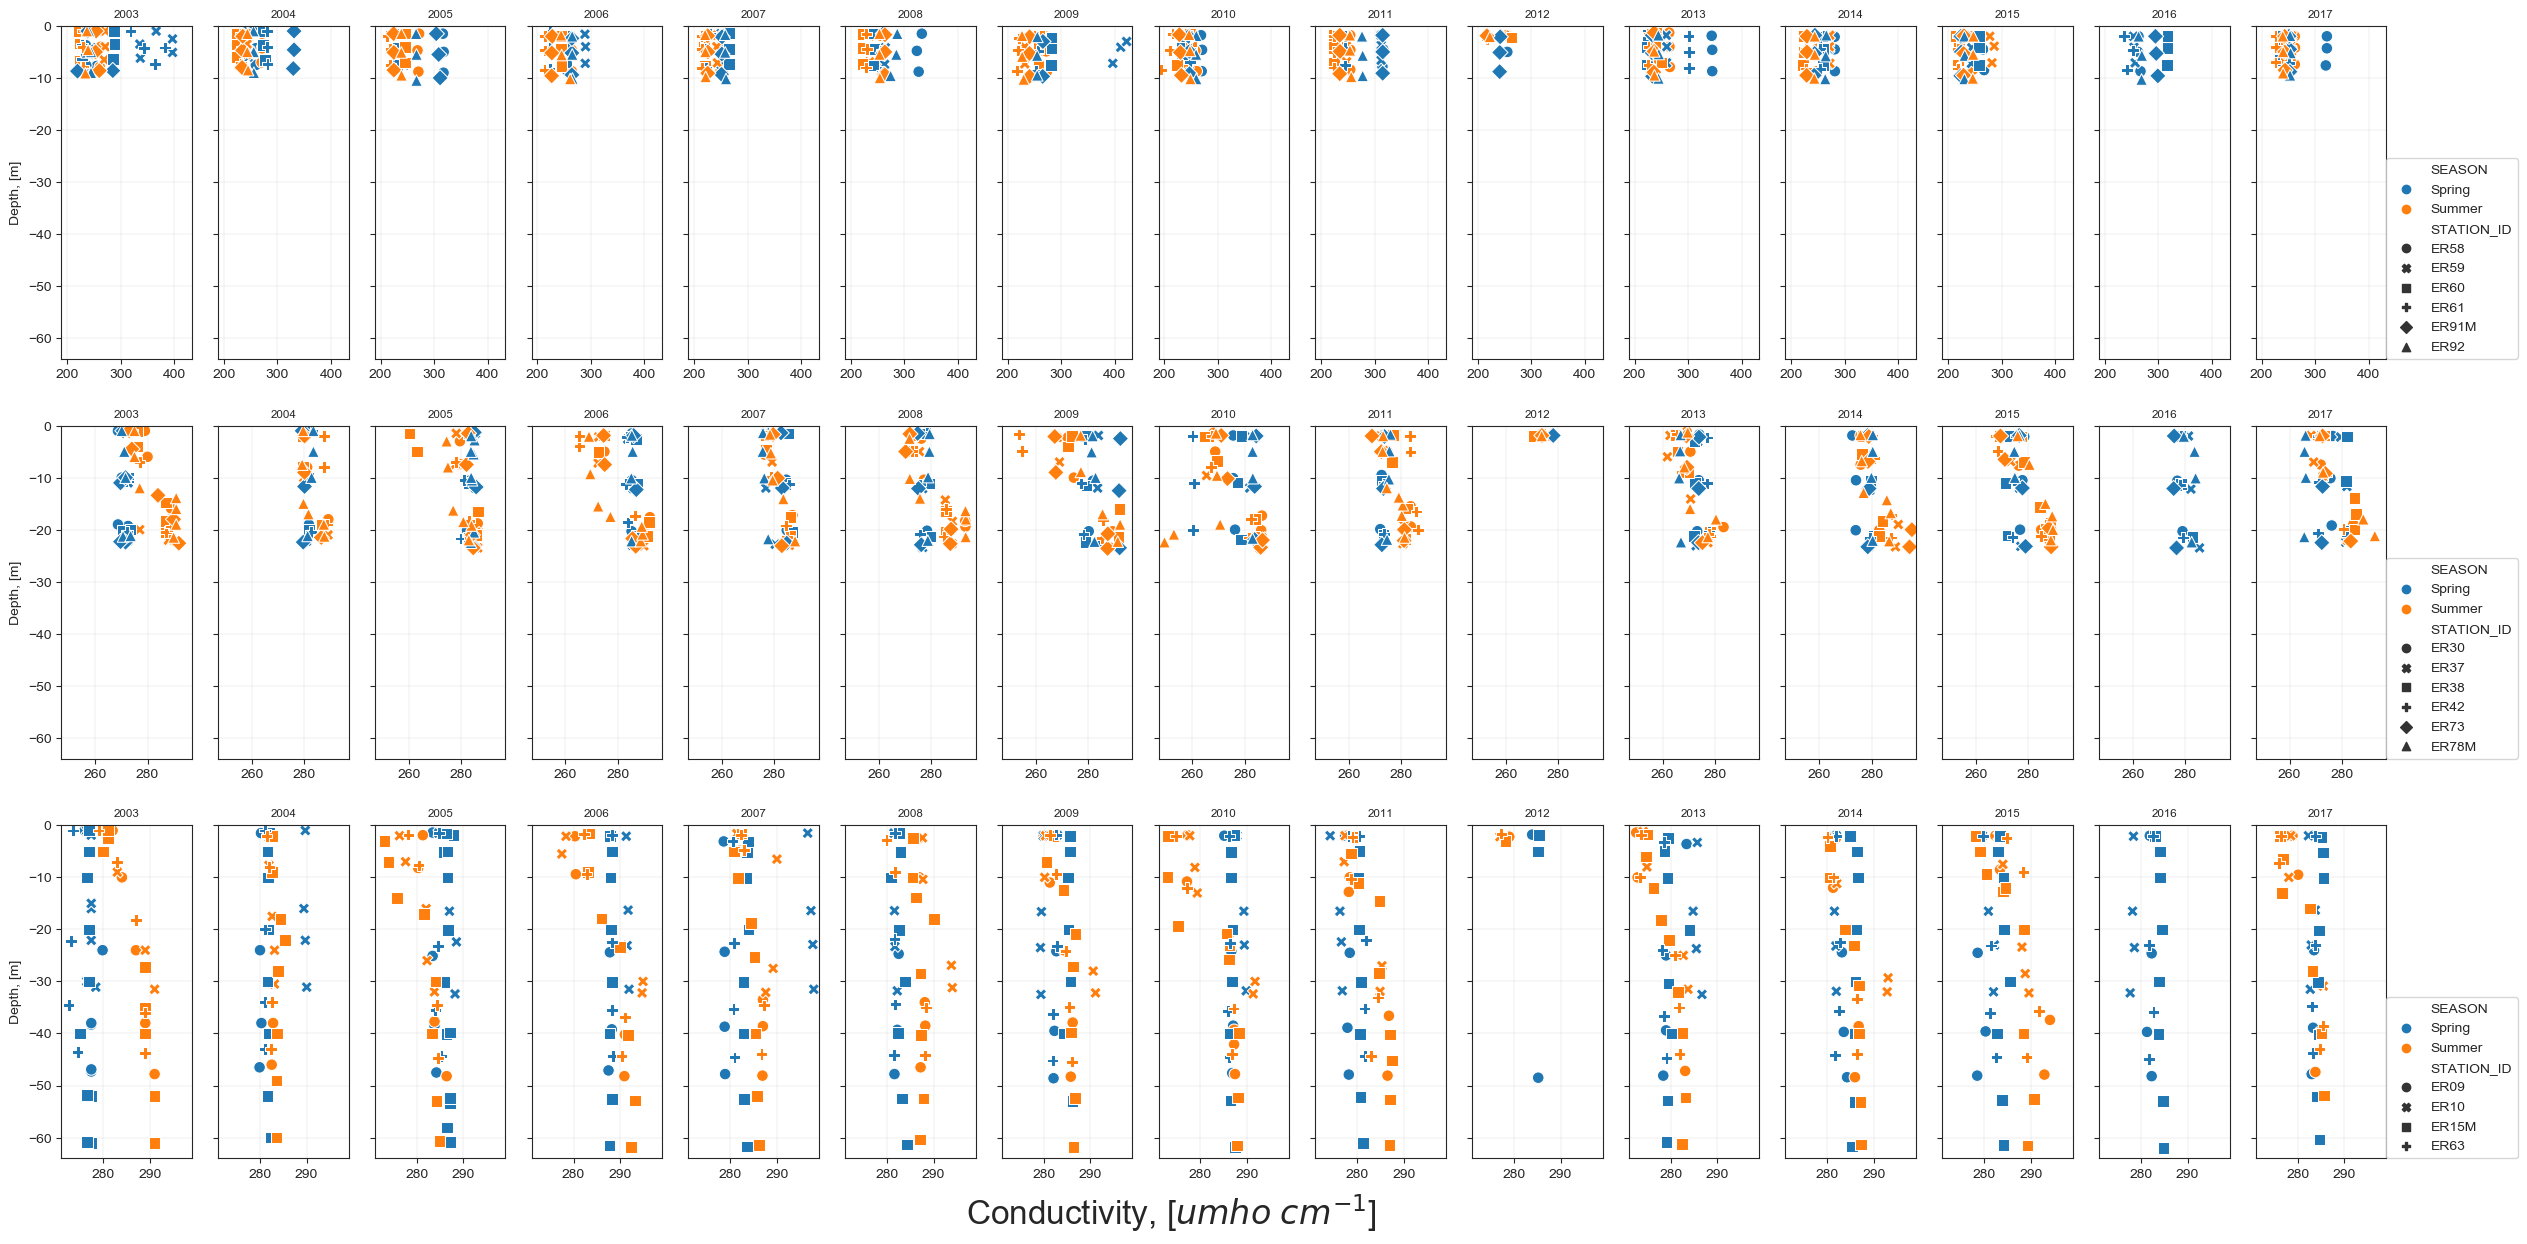

In [80]:
Conductivity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Conductivity.csv')
Conductivity = Conductivity[Conductivity.QC_TYPE=='routine field sample']
Conductivity = Conductivity[~Conductivity.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
Conductivity = Conductivity[Conductivity.YEAR>2002]
Conductivity.loc[:,'SAMPLE_DEPTH_M'] *= -1
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(eastern_basin + central_basin + western_basin)]
Conductivity = Conductivity[Conductivity['SEASON'].isin(seasons)]
Conductivity['VALUE_1'] = pd.to_numeric(Conductivity['VALUE_1'], errors='coerce')
# Conductivity = Conductivity[Conductivity['VALUE_1']>50]
Conductivity = Conductivity.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=False, sharey=True)
for j, y in enumerate(years):
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
        
        sns_data = Conductivity[(Conductivity['STATION_ID'].isin(b)) & (Conductivity['YEAR']==y)]
        sns.scatterplot(x='VALUE_1', y='SAMPLE_DEPTH_M', data=sns_data, ax=axes[i][j], hue='SEASON', style='STATION_ID', s=70)
        
        for k, s in enumerate(seasons):
            data = sns_data[sns_data['SEASON']==s]
            data = data.sort_values('SAMPLE_DEPTH_M')
            xold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['SAMPLE_DEPTH_M'].values
            yold = data.groupby('SAMPLE_DEPTH_M').mean()['VALUE_1'].reset_index()['VALUE_1'].values

#             tck,u  = interpolate.splprep([xold,yold], s=50000000000)
#             unew = np.arange(0, 1.00, 0.1)
#             out = interpolate.splev(unew, tck)
            
#             tck = interpolate.UnivariateSpline(xold, yold, k=1, s=10000000)
#             unew = np.arange(xold.min(), xold.max(), 1)
#             out = tck(unew)
            
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            axes[i][j].set_title(" ".join([str(y)]), fontsize='small')
#             axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr, edgecolor='w')
#             sns_data.loc[:,'SAMPLE_DEPTH_M'] *= -1

#             axes[i][j].plot(out, unew, c=clr, lw=1,zorder=10)
#             axes[i][j].fill_betweenx(-data['z'], data['val']['mean']-data['val']['std'], data['val']['mean']+data['val']['std'], alConductivitya=0.5, lw=0., color=clr)
#             axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
            axes[i][j].legend()
            axes[i][j].legend_.remove()
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].set_xlim(np.floor(axes[i][j].get_xlim()[0]), np.ceil(axes[i][j].get_xlim()[1]))
#             for c,st in zip(sns.color_palette().as_hex()[:len(b)],b):
#                 axes[i][j].plot(data[data['STATION_ID']==st].VALUE_1, data[data['STATION_ID']==st].SAMPLE_DEPTH_M,c=c, lw=0.3, label='')
axes[0][14].legend(loc=(1,0))
axes[1][14].legend(loc=(1,0))
axes[2][14].legend(loc=(1,0))

# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)

# axes[2][2].set_xlim(16,18)
# axes[2][0].set_xlim(16,17.5)

limits = []
for line in axes:
    low = [a.get_xlim()[0] for a in line]
    high = [a.get_xlim()[1] for a in line]
    limits.append((np.floor(min(low)),np.ceil(max(high))))
    
for i,ax in enumerate(axes[0]):
    axes[0][i].set_xlim(limits[0])
    axes[1][i].set_xlim(limits[1])
    axes[2][i].set_xlim(limits[2])
#     axes[0][i].set_xlim(0,2)
#     axes[1][i].set_xlim(0,2)
#     axes[2][i].set_xlim(0,1)
#     axes[2][i].set_xlim(80,100)
# #     axes[2][i].set_xlim(16,20)



axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Conductivity, [$umho$ $cm^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/All Stations/Conductivity_umhocm.pdf')